## Importing Libraries and Data

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import signal
from statsmodels.graphics.tsaplots import plot_pacf
import random
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import MinMaxScaler

In [3]:
for year in range(2021, 2026):
    delimiter = ';' if year > 2021 else ','
    file_path = f'../data/histo_cotation_{year}.csv'
    globals()[f'data_{year}'] = pd.read_csv(file_path, delimiter=delimiter, engine='python')
    print(f"Loaded data_{year}: {globals()[f'data_{year}'].shape}")

Loaded data_2021: (137372, 11)
Loaded data_2022: (83939, 11)
Loaded data_2023: (147209, 11)
Loaded data_2024: (145381, 11)
Loaded data_2025: (142853, 11)


In [4]:
data_2021.head()

,SEANCE,GROUPE,CODE,VALEUR,OUVERTURE,CLOTURE,PLUS_BAS,PLUS_HAUT,QUANTITE_NEGOCIEE,NB_TRANSACTION,CAPITAUX
0,04/01/2021,11,TN0001000108,MONOPRIX,6.16,6.02,6.02,6.29,712,11,4308.75
1,04/01/2021,11,TN0001100254,SFBT,19.01,18.8,18.75,19.01,26225,87,493305.57
2,04/01/2021,11,TN0001200401,TUNISAIR,0.59,0.58,0.58,0.58,22816,42,13233.28
3,04/01/2021,11,TN0001500859,AMS,0.9,0.88,0.88,0.92,2115,10,1865.2
4,04/01/2021,11,TN0001600154,ATTIJARI BANK,27.8,27,27,27.8,1040,16,28482.2


In [5]:
# Get all dataframes and their column names
dataframes = {f'data_{year}': globals()[f'data_{year}'] for year in range(2021, 2026)}

for name, df in dataframes.items():
    print(f"{name} has columns: {df.columns.tolist()}")

data_2021 has columns: ['SEANCE', 'GROUPE', 'CODE', 'VALEUR', 'OUVERTURE', 'CLOTURE', 'PLUS_BAS', 'PLUS_HAUT', 'QUANTITE_NEGOCIEE', 'NB_TRANSACTION', 'CAPITAUX']
data_2022 has columns: ['SEANCE    ', 'GROUPE    ', 'CODE        ', 'VALEUR          ', 'OUVERTURE ', 'CLOTURE    ', 'PLUS_BAS   ', 'PLUS_HAUT ', 'QUANTITE_NEGOCIEE', 'NB_TRANSACTION ', 'CAPITAUX ']
data_2023 has columns: ['SEANCE    ', 'GROUPE    ', 'CODE        ', 'VALEUR          ', 'OUVERTURE ', 'CLOTURE    ', 'PLUS_BAS   ', 'PLUS_HAUT ', 'QUANTITE_NEGOCIEE', 'NB_TRANSACTION ', 'CAPITAUX ']
data_2024 has columns: ['SEANCE    ', 'GROUPE    ', 'CODE        ', 'VALEUR          ', 'OUVERTURE ', 'CLOTURE    ', 'PLUS_BAS   ', 'PLUS_HAUT ', 'QUANTITE_NEGOCIEE', 'NB_TRANSACTION ', 'CAPITAUX ']
data_2025 has columns: ['SEANCE    ', 'GROUPE    ', 'CODE        ', 'VALEUR          ', 'OUVERTURE ', 'CLOTURE    ', 'PLUS_BAS   ', 'PLUS_HAUT ', 'QUANTITE_NEGOCIEE', 'NB_TRANSACTION ', 'CAPITAUX ']


In [6]:
for year in range(2021, 2026):
    df_name = f'data_{year}'
    globals()[df_name].columns = globals()[df_name].columns.str.strip()
    print(f"Cleaned {df_name} columns: {globals()[df_name].columns.tolist()}")

dataframes = {f'data_{year}': globals()[f'data_{year}'] for year in range(2021, 2026)}
reference_cols = dataframes['data_2021'].columns.tolist()

all_same = all(df.columns.tolist() == reference_cols for df in dataframes.values())
print(f"\nAll dataframes have identical column names: {all_same}")

Cleaned data_2021 columns: ['SEANCE', 'GROUPE', 'CODE', 'VALEUR', 'OUVERTURE', 'CLOTURE', 'PLUS_BAS', 'PLUS_HAUT', 'QUANTITE_NEGOCIEE', 'NB_TRANSACTION', 'CAPITAUX']
Cleaned data_2022 columns: ['SEANCE', 'GROUPE', 'CODE', 'VALEUR', 'OUVERTURE', 'CLOTURE', 'PLUS_BAS', 'PLUS_HAUT', 'QUANTITE_NEGOCIEE', 'NB_TRANSACTION', 'CAPITAUX']
Cleaned data_2023 columns: ['SEANCE', 'GROUPE', 'CODE', 'VALEUR', 'OUVERTURE', 'CLOTURE', 'PLUS_BAS', 'PLUS_HAUT', 'QUANTITE_NEGOCIEE', 'NB_TRANSACTION', 'CAPITAUX']
Cleaned data_2024 columns: ['SEANCE', 'GROUPE', 'CODE', 'VALEUR', 'OUVERTURE', 'CLOTURE', 'PLUS_BAS', 'PLUS_HAUT', 'QUANTITE_NEGOCIEE', 'NB_TRANSACTION', 'CAPITAUX']
Cleaned data_2025 columns: ['SEANCE', 'GROUPE', 'CODE', 'VALEUR', 'OUVERTURE', 'CLOTURE', 'PLUS_BAS', 'PLUS_HAUT', 'QUANTITE_NEGOCIEE', 'NB_TRANSACTION', 'CAPITAUX']

All dataframes have identical column names: True


In [7]:
# Concatenate all dataframes in chronological order
dataset = pd.concat([globals()[f'data_{year}'] for year in range(2021, 2026)], ignore_index=True)

print(f"Combined dataset shape: {dataset.shape}")
display(dataset.head(3))
display(dataset.tail(3))

Combined dataset shape: (656754, 11)


,SEANCE,GROUPE,CODE,VALEUR,OUVERTURE,CLOTURE,PLUS_BAS,PLUS_HAUT,QUANTITE_NEGOCIEE,NB_TRANSACTION,CAPITAUX
0,04/01/2021,11,TN0001000108,MONOPRIX,6.16,6.02,6.02,6.29,712,11,4308.75
1,04/01/2021,11,TN0001100254,SFBT,19.01,18.8,18.75,19.01,26225,87,493305.57
2,04/01/2021,11,TN0001200401,TUNISAIR,0.59,0.58,0.58,0.58,22816,42,13233.28


,SEANCE,GROUPE,CODE,VALEUR,OUVERTURE,CLOTURE,PLUS_BAS,PLUS_HAUT,QUANTITE_NEGOCIEE,NB_TRANSACTION,CAPITAUX
656751,31/12/2025,99,TN0007650013,TAWASOL GP HOLDING,0.77,0.8,0.8,0.8,52534,40,42027.2
656752,31/12/2025,99,TN0007690019,UADH,0.6,0.6,0.6,0.6,10,1,6.0
656753,31/12/2025,99,TN0007730013,SANIMED,0.57,0.57,0.0,0.0,0,0,0.0


### Data Dictionary

Understanding the columns in our stock market dataset:

#### **Temporal & Identification**
- **SEANCE** — Trading session date (trading days only, excludes weekends/holidays)
- **CODE** — Unique instrument identifier (ISIN-like code, stable across time)
- **VALEUR** — Human-readable instrument name (display purposes)

#### **Price Data (OHLC)**
- **OUVERTURE** — Opening price for the session
- **CLOTURE** — Closing price (primary reference for analysis)
- **PLUS_BAS** — Lowest intraday price (downside pressure indicator)
- **PLUS_HAUT** — Highest intraday price (upside movement indicator)

#### **Volume & Activity**
- **QUANTITE_NEGOCIEE** — Total shares traded (liquidity measure)
- **NB_TRANSACTION** — Number of executed trades (distinguishes block trades vs. many small trades)
- **CAPITAUX** — Total traded value ≈ price × quantity (monetary liquidity)

#### **Market Segmentation**
- **GROUPE** — Market segment/listing category (affects liquidity, volatility, and trading rules)

> **Note:** Zero values in volume columns indicate illiquidity or non-trading sessions for specific instruments.

## EDA
### 1. Dataset Overview

In [8]:
# Basic information about the dataset
print("=" * 60)
print("DATASET OVERVIEW")
print("=" * 60)
print(f"\nShape: {dataset.shape}")
print(f"Number of rows: {dataset.shape[0]:,}")
print(f"Number of columns: {dataset.shape[1]}")
print(f"\nColumn names:\n{dataset.columns.tolist()}")
print(f"\nMemory usage:\n{dataset.memory_usage(deep=True)}")
print(f"\nTotal memory: {dataset.memory_usage(deep=True).sum() / 1024**2:.2f} MB")

DATASET OVERVIEW

Shape: (656754, 11)
Number of rows: 656,754
Number of columns: 11

Column names:
['SEANCE', 'GROUPE', 'CODE', 'VALEUR', 'OUVERTURE', 'CLOTURE', 'PLUS_BAS', 'PLUS_HAUT', 'QUANTITE_NEGOCIEE', 'NB_TRANSACTION', 'CAPITAUX']

Memory usage:
Index                     132
SEANCE               40306570
GROUPE               25703704
CODE                 40060954
VALEUR               43749035
OUVERTURE            23716902
CLOTURE              23859668
PLUS_BAS             23566880
PLUS_HAUT            23537944
QUANTITE_NEGOCIEE    25606615
NB_TRANSACTION       25574605
CAPITAUX             23574286
dtype: int64

Total memory: 304.47 MB


### 2. Data Types & Structure

In [9]:
# Data types and info
print("=" * 60)
print("DATA TYPES")
print("=" * 60)
print(dataset.dtypes)
print("\n" + "=" * 60)
print("DETAILED INFO")
print("=" * 60)
dataset.info()

DATA TYPES
SEANCE               object
GROUPE               object
CODE                 object
VALEUR               object
OUVERTURE            object
CLOTURE              object
PLUS_BAS             object
PLUS_HAUT            object
QUANTITE_NEGOCIEE    object
NB_TRANSACTION       object
CAPITAUX             object
dtype: object

DETAILED INFO
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 656754 entries, 0 to 656753
Data columns (total 11 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   SEANCE             656752 non-null  object
 1   GROUPE             656752 non-null  object
 2   CODE               656752 non-null  object
 3   VALEUR             656752 non-null  object
 4   OUVERTURE          656752 non-null  object
 5   CLOTURE            656752 non-null  object
 6   PLUS_BAS           656752 non-null  object
 7   PLUS_HAUT          656752 non-null  object
 8   QUANTITE_NEGOCIEE  656752 non-null  object
 9   NB_TRANS

In [10]:
# Convert data types
print("=" * 60)
print("DATA TYPE CONVERSION")
print("=" * 60)

# Strip whitespace from SEANCE column first
dataset['SEANCE'] = dataset['SEANCE'].str.strip()

# Convert SEANCE to datetime (format: dd/mm/yyyy)
dataset['SEANCE'] = pd.to_datetime(dataset['SEANCE'], format='%d/%m/%Y', errors='coerce')

# Convert numeric columns to float
float_columns = ['OUVERTURE', 'CLOTURE', 'PLUS_BAS', 'PLUS_HAUT', 'CAPITAUX']
for col in float_columns:
    dataset[col] = pd.to_numeric(dataset[col], errors='coerce')

# Convert to integer
int_columns = ['QUANTITE_NEGOCIEE', 'NB_TRANSACTION', 'GROUPE']
for col in int_columns:
    dataset[col] = pd.to_numeric(dataset[col], errors='coerce').astype('Int64')

print("\n" + "=" * 60)
print("CONVERTED DATA TYPES")
print("=" * 60)
print(dataset.dtypes)

print("\n" + "=" * 60)
print("SAMPLE DATA AFTER CONVERSION")
print("=" * 60)
display(dataset.head())

DATA TYPE CONVERSION

CONVERTED DATA TYPES
SEANCE               datetime64[ns]
GROUPE                        Int64
CODE                         object
VALEUR                       object
OUVERTURE                   float64
CLOTURE                     float64
PLUS_BAS                    float64
PLUS_HAUT                   float64
QUANTITE_NEGOCIEE             Int64
NB_TRANSACTION                Int64
CAPITAUX                    float64
dtype: object

SAMPLE DATA AFTER CONVERSION


,SEANCE,GROUPE,CODE,VALEUR,OUVERTURE,CLOTURE,PLUS_BAS,PLUS_HAUT,QUANTITE_NEGOCIEE,NB_TRANSACTION,CAPITAUX
0,2021-01-04,11,TN0001000108,MONOPRIX,6.16,6.02,6.02,6.29,712,11,4308.75
1,2021-01-04,11,TN0001100254,SFBT,19.01,18.80,18.75,19.01,26225,87,493305.57
2,2021-01-04,11,TN0001200401,TUNISAIR,0.59,0.58,0.58,0.58,22816,42,13233.28
3,2021-01-04,11,TN0001500859,AMS,0.90,0.88,0.88,0.92,2115,10,1865.20
4,2021-01-04,11,TN0001600154,ATTIJARI BANK,27.80,27.00,27.00,27.80,1040,16,28482.20


In [11]:
# Debug: Check SEANCE values before conversion
print("Checking SEANCE column before conversion:")
print("\nFirst 5 values:")
print(dataset['SEANCE'].head().tolist())
print("\nLast 5 values:")
print(dataset['SEANCE'].tail().tolist())
print("\nData type:", dataset['SEANCE'].dtype)
print("\nSample with repr to see hidden characters:")
for i in [-5, -4, -3, -2, -1]:
    val = dataset.iloc[i]['SEANCE']
    print(f"Row {i}: repr={repr(val)}, stripped={repr(val.strip() if isinstance(val, str) else val)}")

Checking SEANCE column before conversion:

First 5 values:
[Timestamp('2021-01-04 00:00:00'), Timestamp('2021-01-04 00:00:00'), Timestamp('2021-01-04 00:00:00'), Timestamp('2021-01-04 00:00:00'), Timestamp('2021-01-04 00:00:00')]

Last 5 values:
[Timestamp('2025-12-31 00:00:00'), Timestamp('2025-12-31 00:00:00'), Timestamp('2025-12-31 00:00:00'), Timestamp('2025-12-31 00:00:00'), Timestamp('2025-12-31 00:00:00')]

Data type: datetime64[ns]

Sample with repr to see hidden characters:
Row -5: repr=Timestamp('2025-12-31 00:00:00'), stripped=Timestamp('2025-12-31 00:00:00')
Row -4: repr=Timestamp('2025-12-31 00:00:00'), stripped=Timestamp('2025-12-31 00:00:00')
Row -3: repr=Timestamp('2025-12-31 00:00:00'), stripped=Timestamp('2025-12-31 00:00:00')
Row -2: repr=Timestamp('2025-12-31 00:00:00'), stripped=Timestamp('2025-12-31 00:00:00')
Row -1: repr=Timestamp('2025-12-31 00:00:00'), stripped=Timestamp('2025-12-31 00:00:00')


In [12]:
# First and last rows
print("=" * 60)
print("FIRST 10 ROWS")
print("=" * 60)
display(dataset.head(3))

print("\n" + "=" * 60)
print("LAST 10 ROWS")
print("=" * 60)
display(dataset.tail(3))

FIRST 10 ROWS


,SEANCE,GROUPE,CODE,VALEUR,OUVERTURE,CLOTURE,PLUS_BAS,PLUS_HAUT,QUANTITE_NEGOCIEE,NB_TRANSACTION,CAPITAUX
0,2021-01-04,11,TN0001000108,MONOPRIX,6.16,6.02,6.02,6.29,712,11,4308.75
1,2021-01-04,11,TN0001100254,SFBT,19.01,18.80,18.75,19.01,26225,87,493305.57
2,2021-01-04,11,TN0001200401,TUNISAIR,0.59,0.58,0.58,0.58,22816,42,13233.28



LAST 10 ROWS


,SEANCE,GROUPE,CODE,VALEUR,OUVERTURE,CLOTURE,PLUS_BAS,PLUS_HAUT,QUANTITE_NEGOCIEE,NB_TRANSACTION,CAPITAUX
656751,2025-12-31,99,TN0007650013,TAWASOL GP HOLDING,0.77,0.80,0.8,0.8,52534,40,42027.2
656752,2025-12-31,99,TN0007690019,UADH,0.60,0.60,0.6,0.6,10,1,6.0
656753,2025-12-31,99,TN0007730013,SANIMED,0.57,0.57,0.0,0.0,0,0,0.0


### 3. Missing Values Analysis

MISSING VALUES ANALYSIS
               Column  Missing_Count  Missing_Percent
0              SEANCE              6         0.000914
1              GROUPE              6         0.000914
2                CODE              2         0.000305
3              VALEUR              2         0.000305
4           OUVERTURE              6         0.000914
5             CLOTURE              6         0.000914
6            PLUS_BAS              6         0.000914
7           PLUS_HAUT              6         0.000914
8   QUANTITE_NEGOCIEE              6         0.000914
9      NB_TRANSACTION              6         0.000914
10           CAPITAUX              6         0.000914

Total missing values: 58
Any missing values: True


<Figure size 1200x600 with 0 Axes>

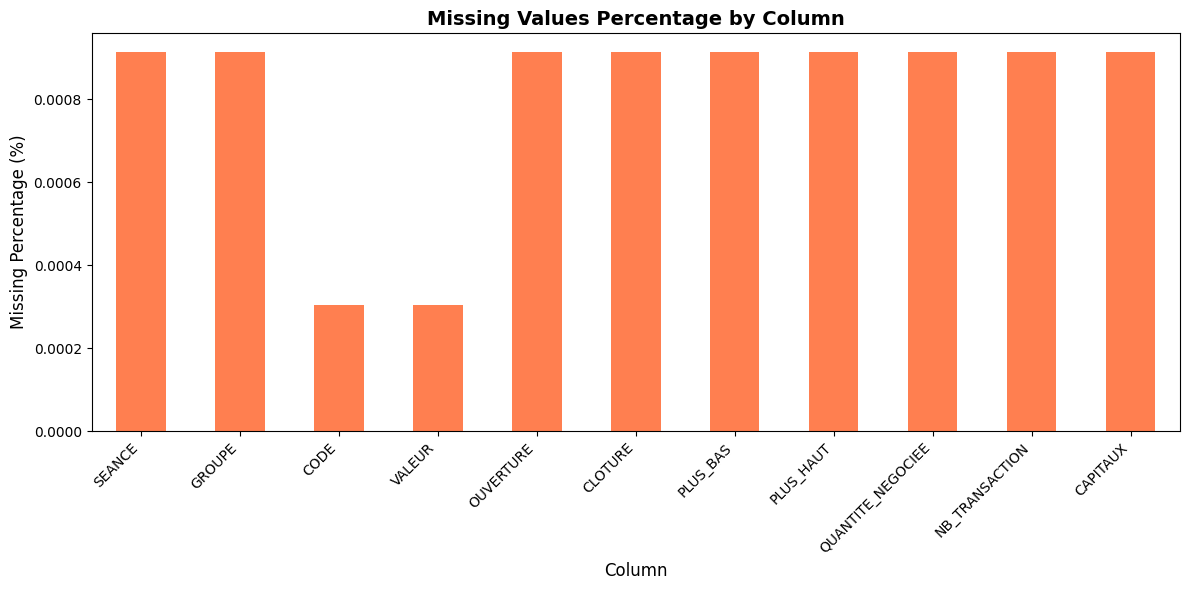

In [13]:
# Check for missing values
print("=" * 60)
print("MISSING VALUES ANALYSIS")
print("=" * 60)

missing_counts = dataset.isnull().sum()
missing_percent = (dataset.isnull().sum() / len(dataset)) * 100

missing_df = pd.DataFrame({
    'Column': missing_counts.index,
    'Missing_Count': missing_counts.values,
    'Missing_Percent': missing_percent.values
})

print(missing_df)
print(f"\nTotal missing values: {dataset.isnull().sum().sum():,}")
print(f"Any missing values: {dataset.isnull().any().any()}")

# Visualize missing values
plt.figure(figsize=(12, 6))
missing_df.plot(x='Column', y='Missing_Percent', kind='bar', 
                color='coral', legend=False, figsize=(12, 6))
plt.title('Missing Values Percentage by Column', fontsize=14, fontweight='bold')
plt.xlabel('Column', fontsize=12)
plt.ylabel('Missing Percentage (%)', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [14]:
# Explore rows with missing values
print("=" * 80)
print("DETAILED EXPLORATION OF MISSING VALUES")
print("=" * 80)

# Find rows with any missing values
rows_with_missing = dataset[dataset.isnull().any(axis=1)]

print(f"\nTotal rows with at least one missing value: {len(rows_with_missing)}")
print(f"Percentage of dataset: {(len(rows_with_missing)/len(dataset))*100:.2f}%")

# Show all rows with missing values
print("\n" + "=" * 80)
print("ALL ROWS WITH MISSING VALUES")
print("=" * 80)
display(rows_with_missing)

DETAILED EXPLORATION OF MISSING VALUES

Total rows with at least one missing value: 6
Percentage of dataset: 0.00%

ALL ROWS WITH MISSING VALUES


,SEANCE,GROUPE,CODE,VALEUR,OUVERTURE,CLOTURE,PLUS_BAS,PLUS_HAUT,QUANTITE_NEGOCIEE,NB_TRANSACTION,CAPITAUX
49997,NaT,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,<NA>,<NA>,NaN
49998,NaT,<NA>,CODE,VALEUR,NaN,NaN,NaN,NaN,<NA>,<NA>,NaN
49999,NaT,<NA>,------------,--------------------,NaN,NaN,NaN,NaN,<NA>,<NA>,NaN
99997,NaT,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,<NA>,<NA>,NaN
99998,NaT,<NA>,CODE,VALEUR,NaN,NaN,NaN,NaN,<NA>,<NA>,NaN
99999,NaT,<NA>,------------,--------------------,NaN,NaN,NaN,NaN,<NA>,<NA>,NaN


In [15]:
# Drop all rows with missing values
print("=" * 80)
print("DROPPING ROWS WITH MISSING VALUES")
print("=" * 80)

# Store original shape
original_shape = dataset.shape
print(f"\nOriginal dataset shape: {original_shape}")
print(f"Original number of rows: {original_shape[0]:,}")

# Drop rows with any missing values
dataset = dataset.dropna()

# New shape after dropping
new_shape = dataset.shape
rows_dropped = original_shape[0] - new_shape[0]

print(f"\nDataset shape after dropping missing values: {new_shape}")
print(f"New number of rows: {new_shape[0]:,}")
print(f"Rows dropped: {rows_dropped}")
print(f"Percentage of data removed: {(rows_dropped/original_shape[0])*100:.2f}%")

# Sanity check - verify no missing values remain
print("\n" + "=" * 80)
print("SANITY CHECK - MISSING VALUES VERIFICATION")
print("=" * 80)

missing_after = dataset.isnull().sum()
total_missing = missing_after.sum()

print(f"\nTotal missing values after cleanup: {total_missing}")
print(f"Any missing values remaining: {dataset.isnull().any().any()}")

if total_missing == 0:
    print("\n✓ SUCCESS: No missing values remain in the dataset!")
else:
    print(f"\n✗ WARNING: {total_missing} missing values still present!")
    print("\nMissing values by column:")
    print(missing_after[missing_after > 0])

print("\n" + "=" * 80)
print("FINAL DATASET SUMMARY")
print("=" * 80)
print(f"Shape: {dataset.shape}")
print(f"Rows: {dataset.shape[0]:,}")
print(f"Columns: {dataset.shape[1]}")
print(f"Memory usage: {dataset.memory_usage(deep=True).sum() / 1024**2:.2f} MB")

DROPPING ROWS WITH MISSING VALUES

Original dataset shape: (656754, 11)
Original number of rows: 656,754

Dataset shape after dropping missing values: (656748, 11)
New number of rows: 656,748
Rows dropped: 6
Percentage of data removed: 0.00%

SANITY CHECK - MISSING VALUES VERIFICATION

Total missing values after cleanup: 0
Any missing values remaining: False

✓ SUCCESS: No missing values remain in the dataset!

FINAL DATASET SUMMARY
Shape: (656748, 11)
Rows: 656,748
Columns: 11
Memory usage: 131.91 MB


TRADING DAYS PER CODE (TICKER) ANALYSIS

Total unique CODEs: 825

Trading Days Statistics:
  Mean: 796.06 days
  Median: 769 days
  Min: 2 days
  Max: 1257 days
  Std: 410.50 days

TOP 10 MOST TRACKED CODES


,CODE,Trading_Days
547,TN0007830011,1257
31,TN0001200542,1257
30,TN0001200534,1257
29,TN0001200518,1257
28,TN0001200492,1257
27,TN0001200476,1257
26,TN0001200468,1257
25,TN0001200419,1257
24,TN0001200401,1257
23,TN0001100460,1257



BOTTOM 10 LEAST TRACKED CODES


,CODE,Trading_Days
762,TNQK7QIECB53,9
781,TNTEPPETCXN3,9
696,TNHOASGSR955,9
650,TNA3Z7AYXXX2,9
760,TNQEVW1AZTU8,8
555,TN0008000564,8
701,TNI7FVNGCJ77,8
526,TN0007680077,5
361,TN0006640015,2
362,TN0006640023,2



DISTRIBUTION OF TRADING DAYS
Days_Range
0-50         29
51-100       11
101-250      75
251-500     102
501-750     127
751-1000    152
1000+       329
Name: count, dtype: int64


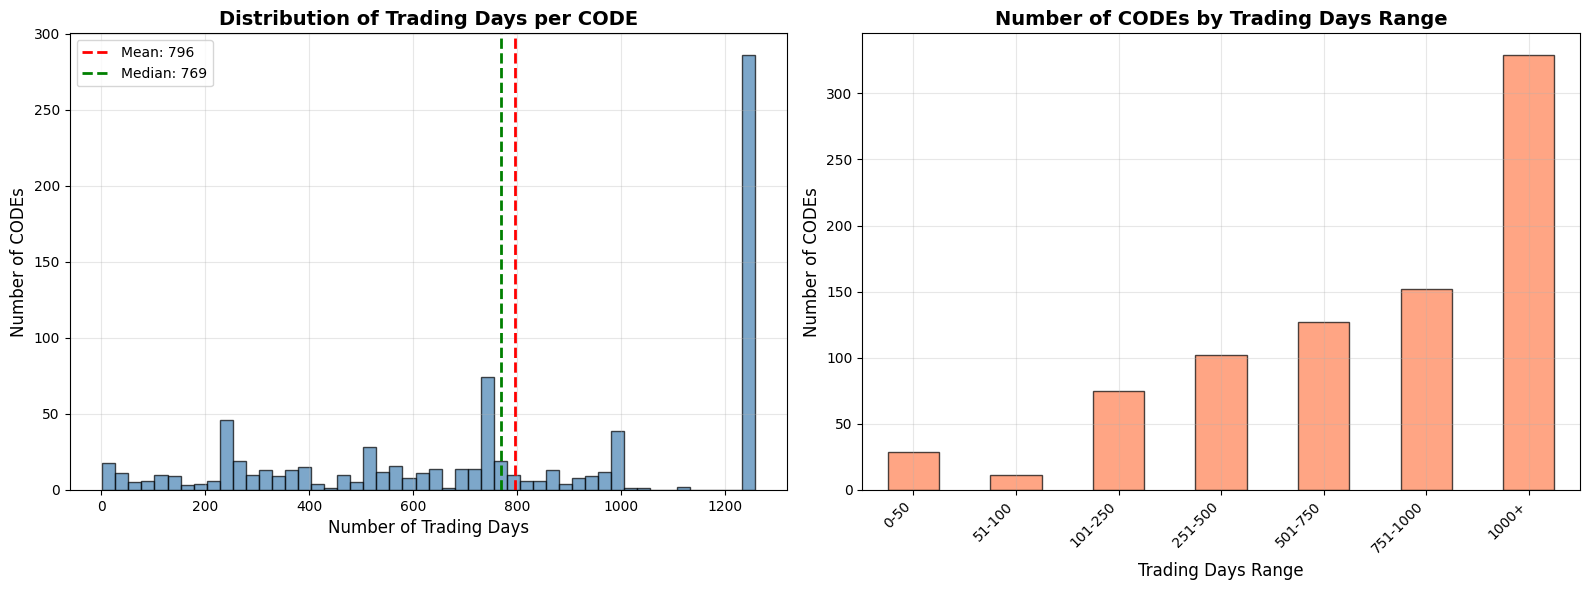

In [16]:
# Analyze how many trading days each CODE has been tracked
print("=" * 80)
print("TRADING DAYS PER CODE (TICKER) ANALYSIS")
print("=" * 80)

# Count unique SEANCE dates for each CODE
days_per_code = dataset.groupby('CODE')['SEANCE'].nunique().reset_index()
days_per_code.columns = ['CODE', 'Trading_Days']
days_per_code = days_per_code.sort_values('Trading_Days', ascending=False)

print(f"\nTotal unique CODEs: {len(days_per_code):,}")
print(f"\nTrading Days Statistics:")
print(f"  Mean: {days_per_code['Trading_Days'].mean():.2f} days")
print(f"  Median: {days_per_code['Trading_Days'].median():.0f} days")
print(f"  Min: {days_per_code['Trading_Days'].min()} days")
print(f"  Max: {days_per_code['Trading_Days'].max()} days")
print(f"  Std: {days_per_code['Trading_Days'].std():.2f} days")

print("\n" + "=" * 80)
print("TOP 10 MOST TRACKED CODES")
print("=" * 80)
display(days_per_code.head(10))

print("\n" + "=" * 80)
print("BOTTOM 10 LEAST TRACKED CODES")
print("=" * 80)
display(days_per_code.tail(10))

print("\n" + "=" * 80)
print("DISTRIBUTION OF TRADING DAYS")
print("=" * 80)

# Create bins for better understanding
bins = [0, 50, 100, 250, 500, 750, 1000, days_per_code['Trading_Days'].max() + 1]
labels = ['0-50', '51-100', '101-250', '251-500', '501-750', '751-1000', '1000+']
days_per_code['Days_Range'] = pd.cut(days_per_code['Trading_Days'], bins=bins, labels=labels, right=False)

distribution = days_per_code['Days_Range'].value_counts().sort_index()
print(distribution)

# Visualize
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Histogram
axes[0].hist(days_per_code['Trading_Days'], bins=50, color='steelblue', edgecolor='black', alpha=0.7)
axes[0].set_title('Distribution of Trading Days per CODE', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Number of Trading Days', fontsize=12)
axes[0].set_ylabel('Number of CODEs', fontsize=12)
axes[0].grid(alpha=0.3)
axes[0].axvline(days_per_code['Trading_Days'].mean(), color='red', linestyle='--', linewidth=2, label=f'Mean: {days_per_code["Trading_Days"].mean():.0f}')
axes[0].axvline(days_per_code['Trading_Days'].median(), color='green', linestyle='--', linewidth=2, label=f'Median: {days_per_code["Trading_Days"].median():.0f}')
axes[0].legend()

# Bar chart of ranges
distribution.plot(kind='bar', ax=axes[1], color='coral', alpha=0.7, edgecolor='black')
axes[1].set_title('Number of CODEs by Trading Days Range', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Trading Days Range', fontsize=12)
axes[1].set_ylabel('Number of CODEs', fontsize=12)
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=45, ha='right')
axes[1].grid(alpha=0.3)

plt.tight_layout()
plt.show()

### 4. Unique Values & Cardinality

In [17]:
# Unique values per column
print("=" * 60)
print("UNIQUE VALUES PER COLUMN")
print("=" * 60)

unique_df = pd.DataFrame({
    'Column': dataset.columns,
    'Unique_Count': [dataset[col].nunique() for col in dataset.columns],
    'Sample_Values': [dataset[col].unique()[:] if dataset[col].nunique() <= 10 
                      else f"{dataset[col].unique()[:3]}... (showing 3 of {dataset[col].nunique()})" 
                      for col in dataset.columns]
})

for idx, row in unique_df.iterrows():
    if(row['Column'] in ['SEANCE', 'GROUPE', 'CODE', 'VALEUR']):
        print(f"\n{row['Column']}:")
        print(f"  Unique values: {row['Unique_Count']:,}")
        print(f"  Sample: {row['Sample_Values']}")

UNIQUE VALUES PER COLUMN

SEANCE:
  Unique values: 1,257
  Sample: <DatetimeArray>
['2021-01-04 00:00:00', '2021-01-05 00:00:00', '2021-01-06 00:00:00']
Length: 3, dtype: datetime64[ns]... (showing 3 of 1257)

GROUPE:
  Unique values: 7
  Sample: <IntegerArray>
[11, 12, 13, 21, 32, 33, 99]
Length: 7, dtype: Int64

CODE:
  Unique values: 825
  Sample: ['TN0001000108' 'TN0001100254' 'TN0001200401']... (showing 3 of 825)

VALEUR:
  Unique values: 1,213
  Sample: ['MONOPRIX' 'SFBT' 'TUNISAIR']... (showing 3 of 1213)


CONSISTENCY CHECK ACROSS YEARS

Unique Values Per Year:


,Year,Total_Rows,Unique_Trading_Days,Unique_Groups,Unique_Codes,Unique_Values
0,2021,137366,248,7,604,793
1,2022,83939,257,6,331,331
2,2023,147209,252,7,659,659
3,2024,145381,251,7,645,645
4,2025,142853,249,6,612,612


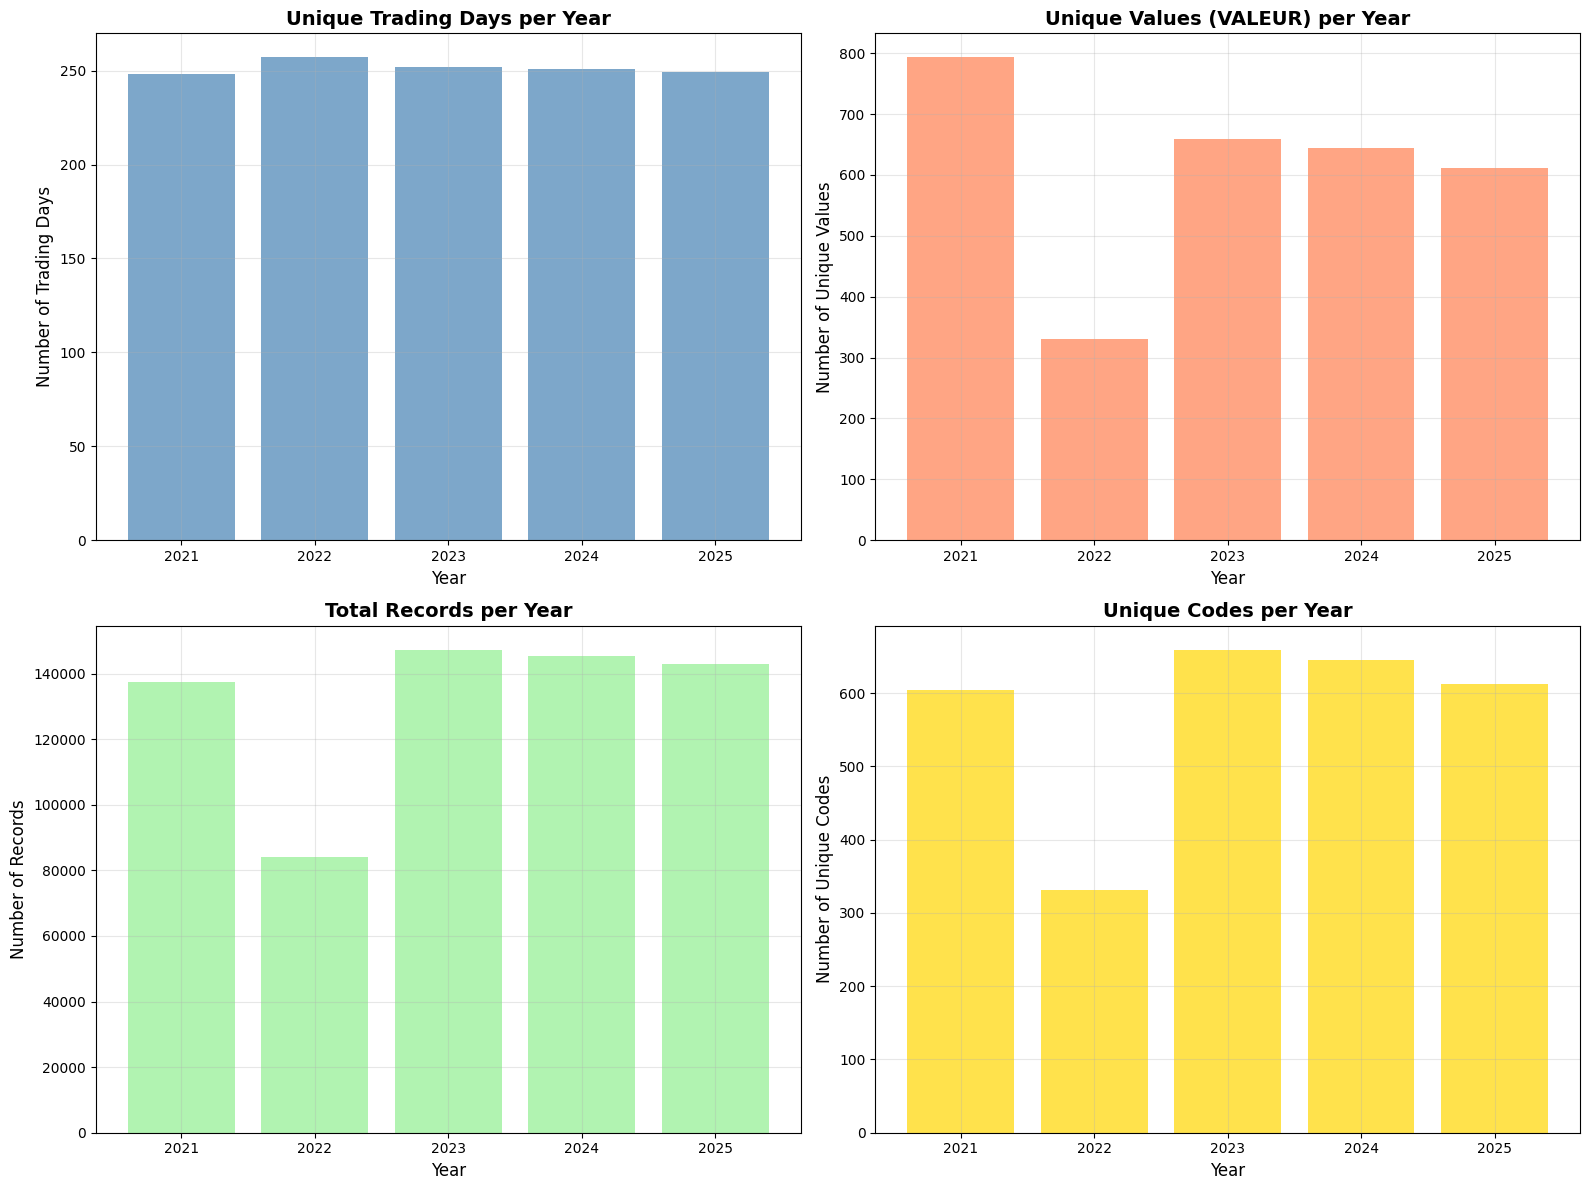

In [18]:
# Check consistency over years
print("=" * 80)
print("CONSISTENCY CHECK ACROSS YEARS")
print("=" * 80)

# Extract year from SEANCE column
dataset['YEAR'] = dataset['SEANCE'].dt.year

# Group by year and count unique values for key columns
columns_to_check = ['SEANCE', 'GROUPE', 'CODE', 'VALEUR']

consistency_report = []
for year in sorted(dataset['YEAR'].unique()):
    year_data = dataset[dataset['YEAR'] == year]
    
    year_stats = {
        'Year': year,
        'Total_Rows': len(year_data),
        'Unique_Trading_Days': year_data['SEANCE'].nunique(),
        'Unique_Groups': year_data['GROUPE'].nunique(),
        'Unique_Codes': year_data['CODE'].nunique(),
        'Unique_Values': year_data['VALEUR'].nunique()
    }
    consistency_report.append(year_stats)

# Create DataFrame from the report
consistency_df = pd.DataFrame(consistency_report)

print("\nUnique Values Per Year:")
print("=" * 80)
display(consistency_df)

# Visualizations
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# 1. Trading Days per Year
axes[0, 0].bar(consistency_df['Year'], consistency_df['Unique_Trading_Days'], color='steelblue', alpha=0.7)
axes[0, 0].set_title('Unique Trading Days per Year', fontsize=14, fontweight='bold')
axes[0, 0].set_xlabel('Year', fontsize=12)
axes[0, 0].set_ylabel('Number of Trading Days', fontsize=12)
axes[0, 0].grid(alpha=0.3)

# 2. Unique Values per Year
axes[0, 1].bar(consistency_df['Year'], consistency_df['Unique_Values'], color='coral', alpha=0.7)
axes[0, 1].set_title('Unique Values (VALEUR) per Year', fontsize=14, fontweight='bold')
axes[0, 1].set_xlabel('Year', fontsize=12)
axes[0, 1].set_ylabel('Number of Unique Values', fontsize=12)
axes[0, 1].grid(alpha=0.3)

# 3. Total Rows per Year
axes[1, 0].bar(consistency_df['Year'], consistency_df['Total_Rows'], color='lightgreen', alpha=0.7)
axes[1, 0].set_title('Total Records per Year', fontsize=14, fontweight='bold')
axes[1, 0].set_xlabel('Year', fontsize=12)
axes[1, 0].set_ylabel('Number of Records', fontsize=12)
axes[1, 0].grid(alpha=0.3)

# 4. Unique Codes per Year
axes[1, 1].bar(consistency_df['Year'], consistency_df['Unique_Codes'], color='gold', alpha=0.7)
axes[1, 1].set_title('Unique Codes per Year', fontsize=14, fontweight='bold')
axes[1, 1].set_xlabel('Year', fontsize=12)
axes[1, 1].set_ylabel('Number of Unique Codes', fontsize=12)
axes[1, 1].grid(alpha=0.3)

plt.tight_layout()
plt.show()
# Remove the YEAR column if not needed
dataset = dataset.drop('YEAR', axis=1)

In [19]:
# Analyze CODE to VALEUR mapping
print("=" * 80)
print("CODE to VALEUR MAPPING ANALYSIS")
print("=" * 80)

# For each CODE, count unique VALEUR values
code_to_valeur = dataset.groupby('CODE')['VALEUR'].nunique().reset_index()
code_to_valeur.columns = ['CODE', 'Unique_VALEUR_Count']
code_to_valeur = code_to_valeur.sort_values('Unique_VALEUR_Count', ascending=False)

print("\n1. For each CODE, how many unique VALEUR values:")
print(f"\nTotal unique CODEs: {len(code_to_valeur)}")
print(f"\nDistribution of VALEUR counts per CODE:")
print(code_to_valeur['Unique_VALEUR_Count'].value_counts().sort_index())

# For each VALEUR, count unique CODE values
print('\n' + "=" * 80)
print("VALEUR to CODE MAPPING ANALYSIS")
print( "=" * 80)

valeur_to_code = dataset.groupby('VALEUR')['CODE'].nunique().reset_index()
valeur_to_code.columns = ['VALEUR', 'Unique_CODE_Count']
valeur_to_code = valeur_to_code.sort_values('Unique_CODE_Count', ascending=False)

print("\n2. For each VALEUR, how many unique CODE values:")
print(f"\nTotal unique VALEURs: {len(valeur_to_code)}")
print(f"\nDistribution of CODE counts per VALEUR:")
print(valeur_to_code['Unique_CODE_Count'].value_counts().sort_index())

CODE to VALEUR MAPPING ANALYSIS

1. For each CODE, how many unique VALEUR values:

Total unique CODEs: 825

Distribution of VALEUR counts per CODE:
Unique_VALEUR_Count
1    516
2    230
3     79
Name: count, dtype: int64

VALEUR to CODE MAPPING ANALYSIS

2. For each VALEUR, how many unique CODE values:

Total unique VALEURs: 1213

Distribution of CODE counts per VALEUR:
Unique_CODE_Count
1    1213
Name: count, dtype: int64


### 5. Statistical Summary - Numerical Features

In [20]:
# Statistical summary
print("=" * 60)
print("STATISTICAL SUMMARY")
print("=" * 60)

# Get numeric columns only
numeric_cols = dataset.select_dtypes(include=[np.number]).columns.tolist()
print(f"\nNumeric columns: {numeric_cols}")

if len(numeric_cols) > 0:
    display(dataset[numeric_cols].describe().T)
    
    # Additional statistics
    print("\n" + "=" * 60)
    print("ADDITIONAL STATISTICS")
    print("=" * 60)
    
    stats_df = pd.DataFrame({
        'Column': numeric_cols,
        'Mean': [dataset[col].mean() for col in numeric_cols],
        'Median': [dataset[col].median() for col in numeric_cols],
        'Std': [dataset[col].std() for col in numeric_cols],
        'Variance': [dataset[col].var() for col in numeric_cols],
        'Skewness': [dataset[col].skew() for col in numeric_cols],
        'Kurtosis': [dataset[col].kurtosis() for col in numeric_cols]
    })
    
    display(stats_df)
else:
    print("\nNo numeric columns found. Need to check data types.")

STATISTICAL SUMMARY

Numeric columns: ['GROUPE', 'OUVERTURE', 'CLOTURE', 'PLUS_BAS', 'PLUS_HAUT', 'QUANTITE_NEGOCIEE', 'NB_TRANSACTION', 'CAPITAUX']


,count,mean,std,min,25%,50%,75%,max
GROUPE,656748.0,26.377435,12.995258,11.0,21.0,21.0,32.0,99.0
OUVERTURE,656748.0,40.388086,46.169018,0.0,0.91,7.5,100.0,237.9
CLOTURE,656748.0,43.656873,46.487341,0.0,1.43,10.96,100.0,242.42
PLUS_BAS,656748.0,2.716946,13.671171,0.0,0.0,0.0,0.0,242.42
PLUS_HAUT,656748.0,1.913008,10.671732,0.0,0.0,0.0,0.0,242.42
QUANTITE_NEGOCIEE,656748.0,1647.26718,50197.93129,0.0,0.0,0.0,0.0,15018924.0
NB_TRANSACTION,656748.0,2.868539,19.596812,0.0,0.0,0.0,0.0,3288.0
CAPITAUX,656748.0,18350.99389,773655.687986,0.0,0.0,0.0,0.0,252735000.0



ADDITIONAL STATISTICS


,Column,Mean,Median,Std,Variance,Skewness,Kurtosis
0,GROUPE,26.377435,21.00,12.995258,1.688767e+02,3.548179,18.191685
1,OUVERTURE,40.388086,7.50,46.169018,2.131578e+03,0.504056,-1.572067
2,CLOTURE,43.656873,10.96,46.487341,2.161073e+03,0.362836,-1.723496
3,PLUS_BAS,2.716946,0.00,13.671171,1.869009e+02,7.198895,58.677541
4,PLUS_HAUT,1.913008,0.00,10.671732,1.138859e+02,9.640849,114.436148
5,QUANTITE_NEGOCIEE,1647.267180,0.00,50197.931290,2.519832e+09,174.233505,39908.342463
6,NB_TRANSACTION,2.868539,0.00,19.596812,3.840351e+02,48.274465,5318.829728
7,CAPITAUX,18350.993890,0.00,773655.687986,5.985431e+11,179.572281,42057.899681


### 6. Distribution Analysis

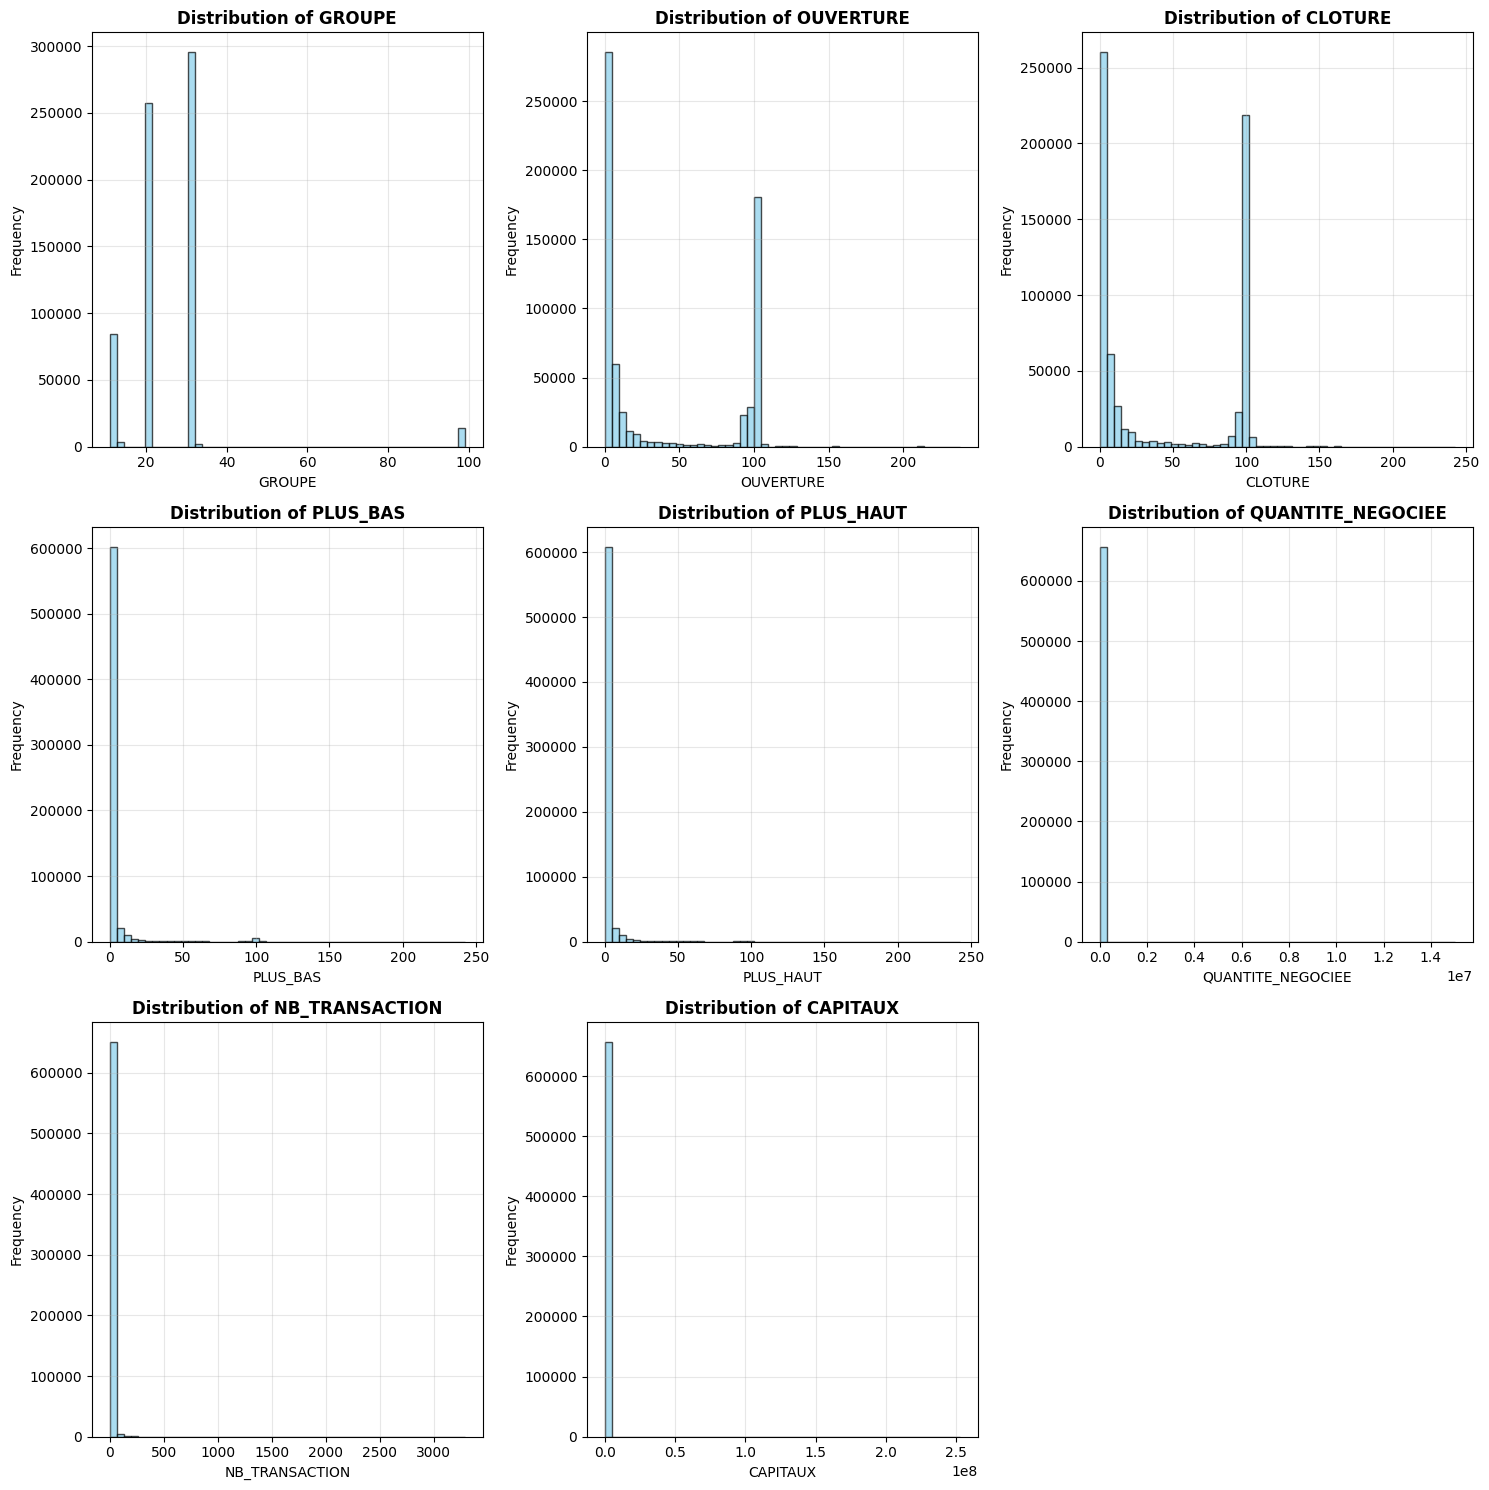

In [21]:
# Distribution plots for numeric columns
numeric_cols = dataset.select_dtypes(include=[np.number]).columns.tolist()

if len(numeric_cols) > 0:
    n_cols = min(3, len(numeric_cols))
    n_rows = (len(numeric_cols) + n_cols - 1) // n_cols
    
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5 * n_rows))
    axes = axes.flatten() if n_rows > 1 else [axes] if n_cols == 1 else axes
    
    for idx, col in enumerate(numeric_cols):
        axes[idx].hist(dataset[col].dropna(), bins=50, color='skyblue', edgecolor='black', alpha=0.7)
        axes[idx].set_title(f'Distribution of {col}', fontweight='bold')
        axes[idx].set_xlabel(col)
        axes[idx].set_ylabel('Frequency')
        axes[idx].grid(alpha=0.3)
    
    # Hide empty subplots
    for idx in range(len(numeric_cols), len(axes)):
        axes[idx].axis('off')
    
    plt.tight_layout()
    plt.show()
else:
    print("No numeric columns to plot.")

DISTRIBUTION ANALYSIS - NON-ZERO VALUES ONLY


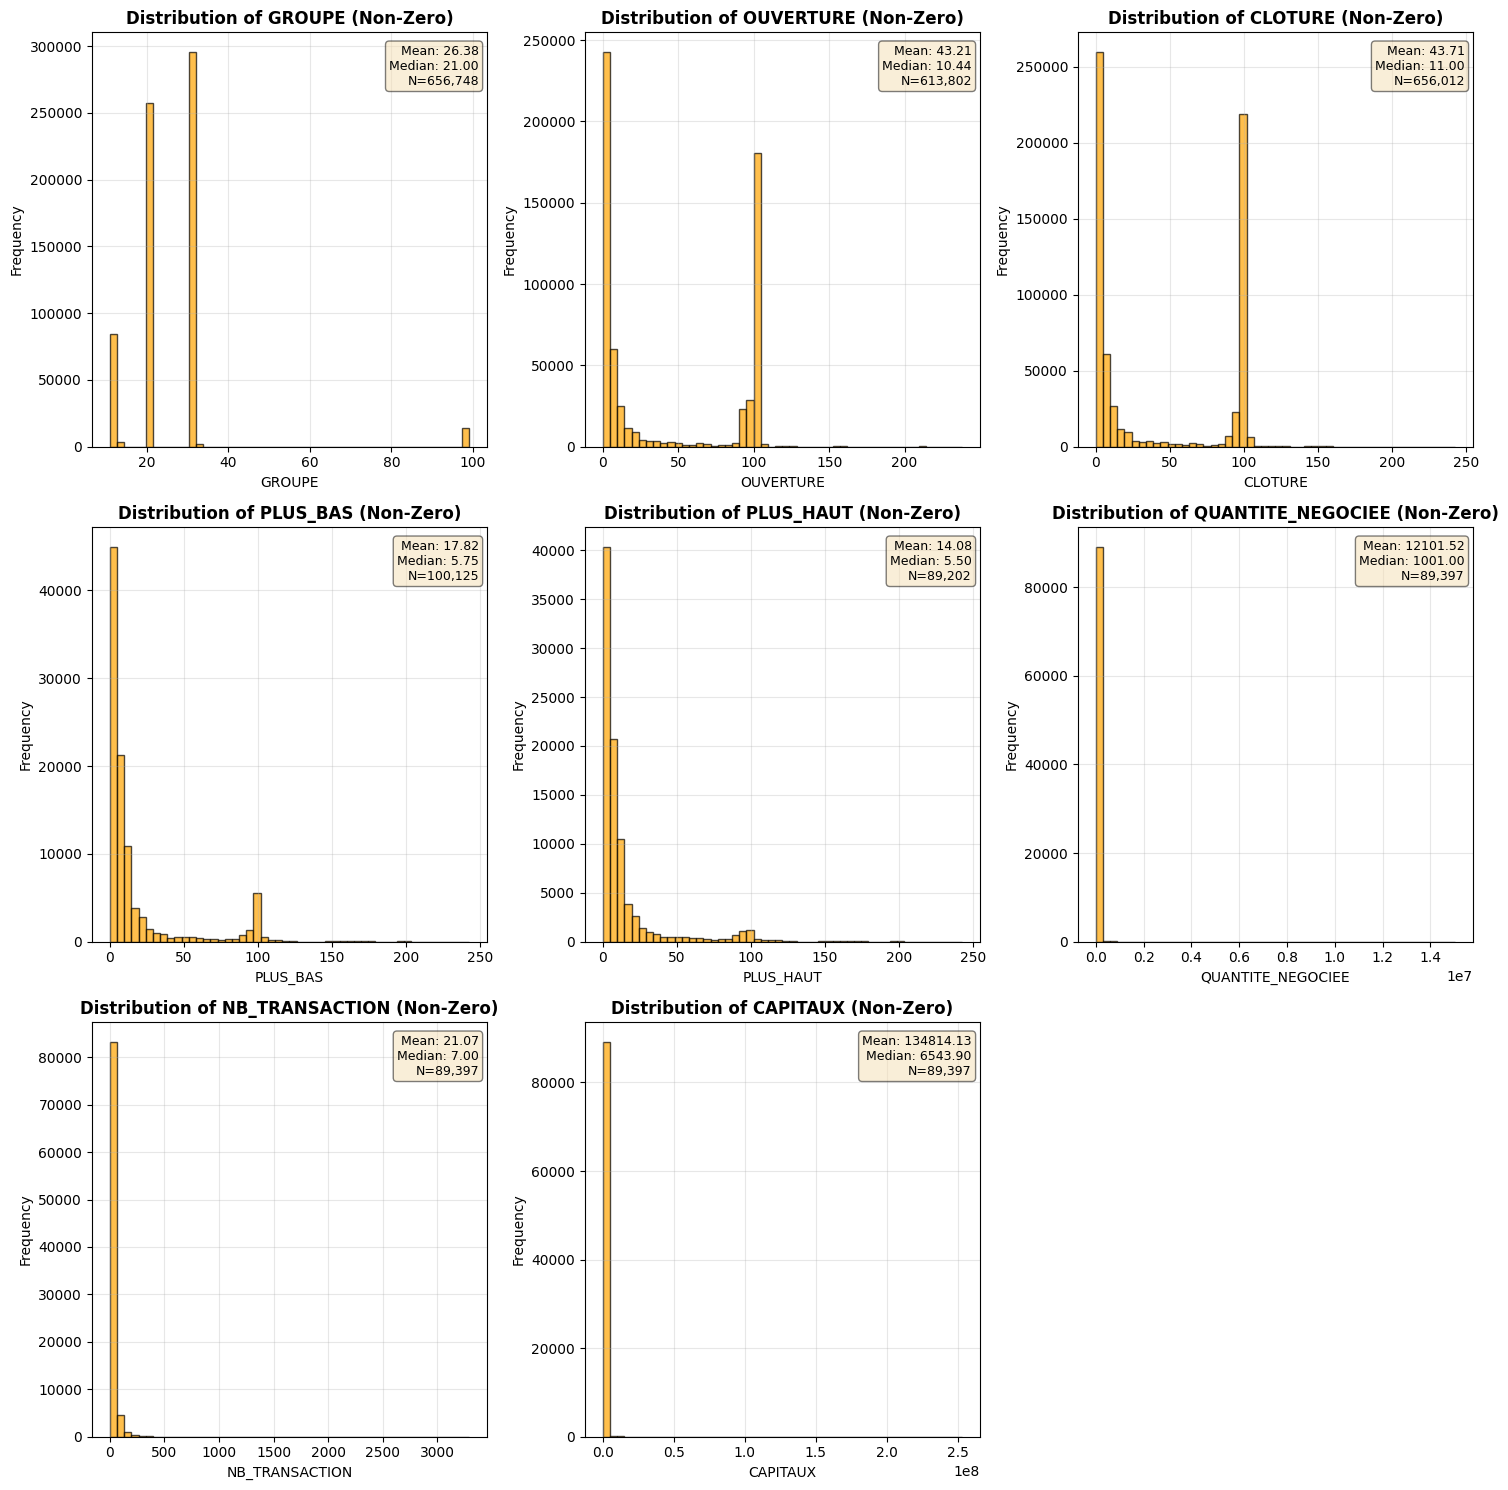


ZERO vs NON-ZERO VALUE STATISTICS


,Column,Total_Count,Zero_Count,Non_Zero_Count,Zero_Percentage
0,GROUPE,656748,0,656748,0.000000
1,OUVERTURE,656748,42946,613802,6.539190
2,CLOTURE,656748,736,656012,0.112067
3,PLUS_BAS,656748,556623,100125,84.754426
4,PLUS_HAUT,656748,567546,89202,86.417621
5,QUANTITE_NEGOCIEE,656748,567351,89397,86.387930
6,NB_TRANSACTION,656748,567351,89397,86.387930
7,CAPITAUX,656748,567351,89397,86.387930


In [22]:
# Distribution plots for numeric columns (excluding zero values)
print("=" * 80)
print("DISTRIBUTION ANALYSIS - NON-ZERO VALUES ONLY")
print("=" * 80)

numeric_cols = dataset.select_dtypes(include=[np.number]).columns.tolist()

if len(numeric_cols) > 0:
    n_cols = min(3, len(numeric_cols))
    n_rows = (len(numeric_cols) + n_cols - 1) // n_cols
    
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5 * n_rows))
    axes = axes.flatten() if n_rows > 1 else [axes] if n_cols == 1 else axes
    
    for idx, col in enumerate(numeric_cols):
        # Filter out zero values
        non_zero_data = dataset[dataset[col] != 0][col].dropna()
        
        if len(non_zero_data) > 0:
            axes[idx].hist(non_zero_data, bins=50, color='orange', edgecolor='black', alpha=0.7)
            axes[idx].set_title(f'Distribution of {col} (Non-Zero)', fontweight='bold')
            axes[idx].set_xlabel(col)
            axes[idx].set_ylabel('Frequency')
            axes[idx].grid(alpha=0.3)
            
            # Add statistics text
            mean_val = non_zero_data.mean()
            median_val = non_zero_data.median()
            stats_text = f'Mean: {mean_val:.2f}\nMedian: {median_val:.2f}\nN={len(non_zero_data):,}'
            axes[idx].text(0.98, 0.97, stats_text, 
                          transform=axes[idx].transAxes,
                          verticalalignment='top',
                          horizontalalignment='right',
                          bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5),
                          fontsize=9)
        else:
            axes[idx].text(0.5, 0.5, f'No non-zero values\nfor {col}',
                          transform=axes[idx].transAxes,
                          ha='center', va='center',
                          fontsize=12, color='red')
            axes[idx].set_title(f'Distribution of {col} (Non-Zero)', fontweight='bold')
    
    # Hide empty subplots
    for idx in range(len(numeric_cols), len(axes)):
        axes[idx].axis('off')
    
    plt.tight_layout()
    plt.show()
    
    # Print statistics about zero vs non-zero values
    print("\n" + "=" * 80)
    print("ZERO vs NON-ZERO VALUE STATISTICS")
    print("=" * 80)
    
    zero_stats = pd.DataFrame({
        'Column': numeric_cols,
        'Total_Count': [len(dataset[col].dropna()) for col in numeric_cols],
        'Zero_Count': [len(dataset[dataset[col] == 0][col]) for col in numeric_cols],
        'Non_Zero_Count': [len(dataset[dataset[col] != 0][col].dropna()) for col in numeric_cols],
        'Zero_Percentage': [(len(dataset[dataset[col] == 0][col]) / len(dataset[col].dropna()) * 100) 
                            if len(dataset[col].dropna()) > 0 else 0 for col in numeric_cols]
    })
    
    display(zero_stats)
else:
    print("No numeric columns to plot.")

### 7. Box Plots - Outlier Detection

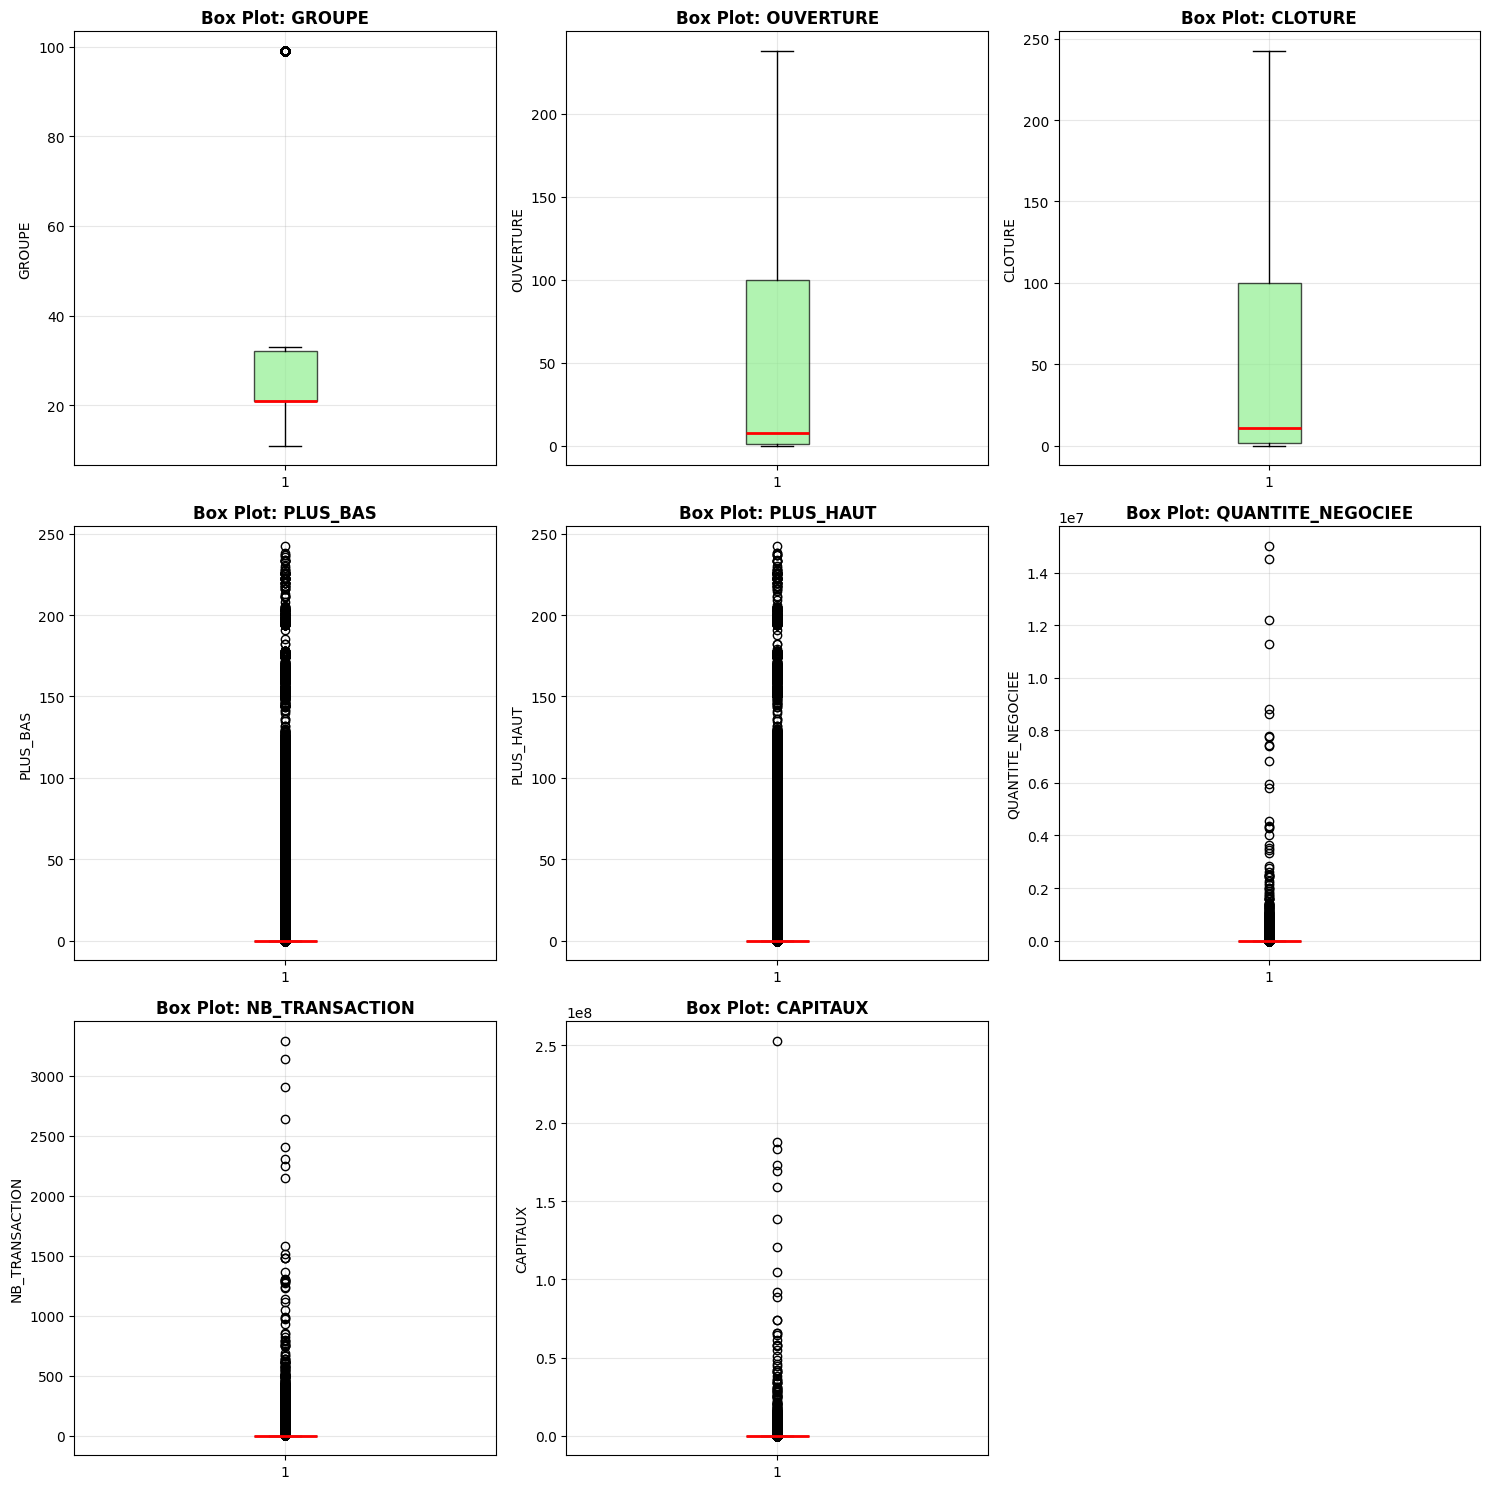


OUTLIER STATISTICS (IQR Method)

GROUPE:
  Lower bound: 4.50
  Upper bound: 48.50
  Number of outliers: 14,091 (2.15%)

OUVERTURE:
  Lower bound: -147.72
  Upper bound: 248.63
  Number of outliers: 0 (0.00%)

CLOTURE:
  Lower bound: -146.42
  Upper bound: 247.85
  Number of outliers: 0 (0.00%)

PLUS_BAS:
  Lower bound: 0.00
  Upper bound: 0.00
  Number of outliers: 100,125 (15.25%)

PLUS_HAUT:
  Lower bound: 0.00
  Upper bound: 0.00
  Number of outliers: 89,202 (13.58%)

QUANTITE_NEGOCIEE:
  Lower bound: 0.00
  Upper bound: 0.00
  Number of outliers: 89,397 (13.61%)

NB_TRANSACTION:
  Lower bound: 0.00
  Upper bound: 0.00
  Number of outliers: 89,397 (13.61%)

CAPITAUX:
  Lower bound: 0.00
  Upper bound: 0.00
  Number of outliers: 89,397 (13.61%)


In [23]:
# Box plots for outlier detection
numeric_cols = dataset.select_dtypes(include=[np.number]).columns.tolist()

if len(numeric_cols) > 0:
    n_cols = min(3, len(numeric_cols))
    n_rows = (len(numeric_cols) + n_cols - 1) // n_cols
    
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5 * n_rows))
    axes = axes.flatten() if n_rows > 1 else [axes] if n_cols == 1 else axes
    
    for idx, col in enumerate(numeric_cols):
        axes[idx].boxplot(dataset[col].dropna(), vert=True, patch_artist=True,
                         boxprops=dict(facecolor='lightgreen', alpha=0.7),
                         medianprops=dict(color='red', linewidth=2))
        axes[idx].set_title(f'Box Plot: {col}', fontweight='bold')
        axes[idx].set_ylabel(col)
        axes[idx].grid(alpha=0.3)
    
    # Hide empty subplots
    for idx in range(len(numeric_cols), len(axes)):
        axes[idx].axis('off')
    
    plt.tight_layout()
    plt.show()
    
    # Calculate outliers using IQR method
    print("\n" + "=" * 60)
    print("OUTLIER STATISTICS (IQR Method)")
    print("=" * 60)
    
    for col in numeric_cols:
        Q1 = dataset[col].quantile(0.25)
        Q3 = dataset[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers = dataset[(dataset[col] < lower_bound) | (dataset[col] > upper_bound)][col]
        
        print(f"\n{col}:")
        print(f"  Lower bound: {lower_bound:.2f}")
        print(f"  Upper bound: {upper_bound:.2f}")
        print(f"  Number of outliers: {len(outliers):,} ({(len(outliers)/len(dataset))*100:.2f}%)")
else:
    print("No numeric columns to plot.")

### 8. Correlation Analysis

CORRELATION MATRIX


,GROUPE,OUVERTURE,CLOTURE,PLUS_BAS,PLUS_HAUT,QUANTITE_NEGOCIEE,NB_TRANSACTION,CAPITAUX
GROUPE,1.000000,-0.339131,-0.362838,-0.139705,-0.151599,-0.019912,-0.106078,-0.020277
OUVERTURE,-0.339131,1.000000,0.927608,0.009715,0.079941,-0.022496,-0.082766,-0.006676
CLOTURE,-0.362838,0.927608,1.000000,0.119845,0.068010,-0.024615,-0.092402,-0.008202
PLUS_BAS,-0.139705,0.009715,0.119845,1.000000,0.764581,0.013481,0.122282,0.041724
PLUS_HAUT,-0.151599,0.079941,0.068010,0.764581,1.000000,0.020229,0.171365,0.055917
QUANTITE_NEGOCIEE,-0.019912,-0.022496,-0.024615,0.013481,0.020229,1.000000,0.174920,0.474489
NB_TRANSACTION,-0.106078,-0.082766,-0.092402,0.122282,0.171365,0.174920,1.000000,0.297192
CAPITAUX,-0.020277,-0.006676,-0.008202,0.041724,0.055917,0.474489,0.297192,1.000000


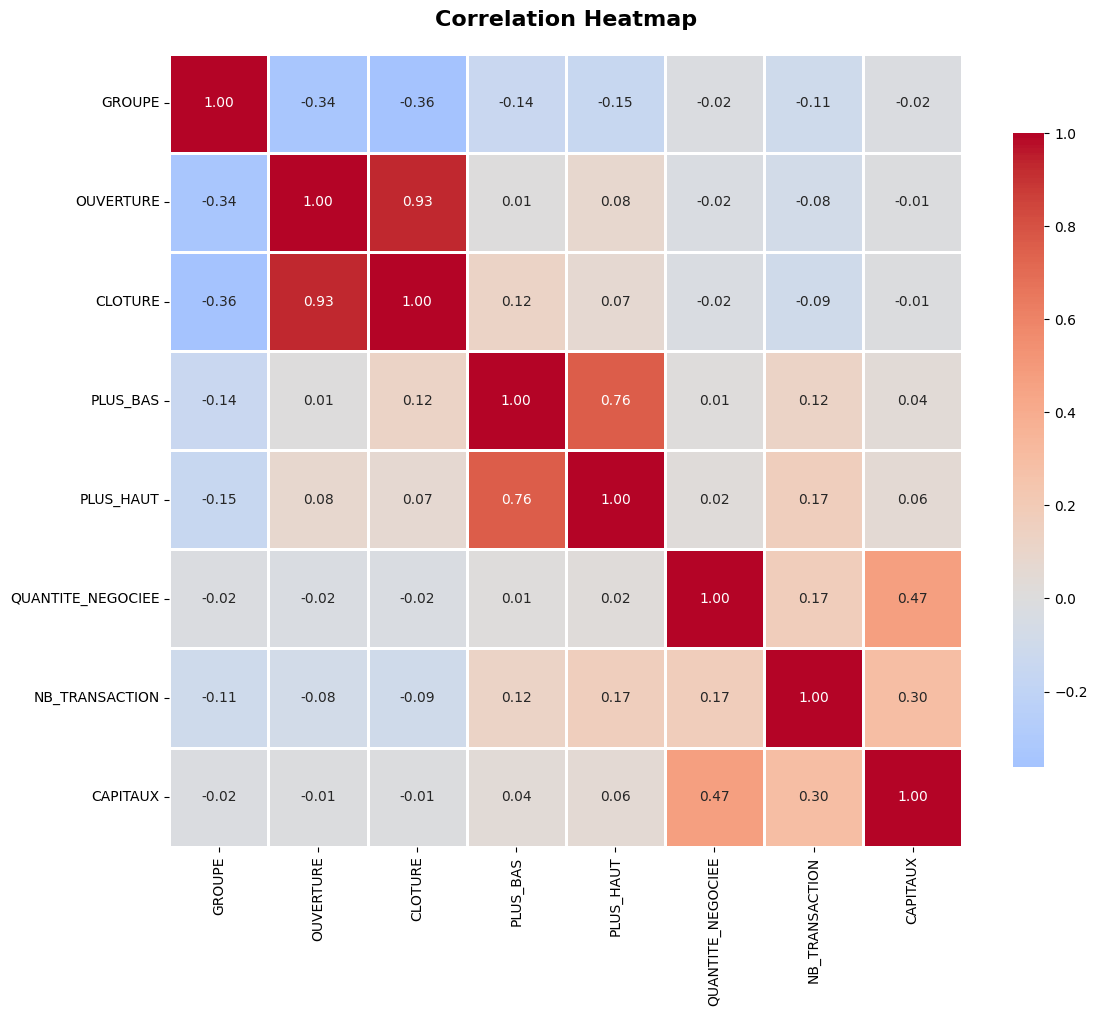


HIGHLY CORRELATED PAIRS (|correlation| > 0.7)
OUVERTURE <-> CLOTURE: 0.928
PLUS_BAS <-> PLUS_HAUT: 0.765


In [24]:
# Correlation matrix for numeric columns
numeric_cols = dataset.select_dtypes(include=[np.number]).columns.tolist()

if len(numeric_cols) > 1:
    correlation_matrix = dataset[numeric_cols].corr()
    
    print("=" * 60)
    print("CORRELATION MATRIX")
    print("=" * 60)
    display(correlation_matrix)
    
    # Heatmap
    plt.figure(figsize=(12, 10))
    sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', 
                center=0, square=True, linewidths=1, cbar_kws={"shrink": 0.8})
    plt.title('Correlation Heatmap', fontsize=16, fontweight='bold', pad=20)
    plt.tight_layout()
    plt.show()
    
    # Find highly correlated pairs
    print("\n" + "=" * 60)
    print("HIGHLY CORRELATED PAIRS (|correlation| > 0.7)")
    print("=" * 60)
    
    # Get correlation pairs
    corr_pairs = []
    for i in range(len(correlation_matrix.columns)):
        for j in range(i+1, len(correlation_matrix.columns)):
            if abs(correlation_matrix.iloc[i, j]) > 0.7:
                corr_pairs.append((
                    correlation_matrix.columns[i],
                    correlation_matrix.columns[j],
                    correlation_matrix.iloc[i, j]
                ))
    
    if corr_pairs:
        for pair in corr_pairs:
            print(f"{pair[0]} <-> {pair[1]}: {pair[2]:.3f}")
    else:
        print("No highly correlated pairs found.")
else:
    print("Not enough numeric columns for correlation analysis.")

### 9. Duplicates Check

In [25]:
# Check for duplicates
print("=" * 60)
print("DUPLICATE ROWS ANALYSIS")
print("=" * 60)

duplicates = dataset.duplicated()
num_duplicates = duplicates.sum()

print(f"\nTotal duplicate rows: {num_duplicates:,}")
print(f"Percentage of duplicates: {(num_duplicates/len(dataset))*100:.2f}%")
print(f"Unique rows: {len(dataset) - num_duplicates:,}")

if num_duplicates > 0:
    print("\nSample of duplicate rows:")
    display(dataset[duplicates].head(10))
else:
    print("\nNo duplicate rows found.")

DUPLICATE ROWS ANALYSIS

Total duplicate rows: 0
Percentage of duplicates: 0.00%
Unique rows: 656,748

No duplicate rows found.


### 10. Data Quality Summary

In [26]:
# Comprehensive data quality report
print("=" * 70)
print("COMPREHENSIVE DATA QUALITY SUMMARY")
print("=" * 70)

quality_report = pd.DataFrame({
    'Column': dataset.columns,
    'Data_Type': [dataset[col].dtype for col in dataset.columns],
    'Non_Null_Count': [dataset[col].notna().sum() for col in dataset.columns],
    'Null_Count': [dataset[col].isna().sum() for col in dataset.columns],
    'Null_Percentage': [(dataset[col].isna().sum() / len(dataset)) * 100 for col in dataset.columns],
    'Unique_Values': [dataset[col].nunique() for col in dataset.columns],
    'Cardinality': [dataset[col].nunique() / len(dataset) * 100 for col in dataset.columns]
})

print("\nData Quality Report:")
display(quality_report)

print("\n" + "=" * 70)
print("KEY INSIGHTS")
print("=" * 70)
print(f"✓ Total Rows: {len(dataset):,}")
print(f"✓ Total Columns: {len(dataset.columns)}")
print(f"✓ Total Missing Values: {dataset.isnull().sum().sum():,}")
print(f"✓ Total Duplicate Rows: {dataset.duplicated().sum():,}")
print(f"✓ Memory Usage: {dataset.memory_usage(deep=True).sum() / 1024**2:.2f} MB")
print(f"✓ Numeric Columns: {len(dataset.select_dtypes(include=[np.number]).columns)}")
print(f"✓ Categorical Columns: {len(dataset.select_dtypes(include=['object']).columns)}")
print(f"✓ Date Columns: {len(dataset.select_dtypes(include=['datetime64']).columns)}")

print("\n" + "=" * 70)
print("EDA COMPLETE!")
print("=" * 70)

COMPREHENSIVE DATA QUALITY SUMMARY

Data Quality Report:


,Column,Data_Type,Non_Null_Count,Null_Count,Null_Percentage,Unique_Values,Cardinality
0,SEANCE,datetime64[ns],656748,0,0.0,1257,0.191398
1,GROUPE,Int64,656748,0,0.0,7,0.001066
2,CODE,object,656748,0,0.0,825,0.125619
3,VALEUR,object,656748,0,0.0,1213,0.184698
4,OUVERTURE,float64,656748,0,0.0,7198,1.096006
5,CLOTURE,float64,656748,0,0.0,7867,1.197872
6,PLUS_BAS,float64,656748,0,0.0,5362,0.816447
7,PLUS_HAUT,float64,656748,0,0.0,5277,0.803505
8,QUANTITE_NEGOCIEE,Int64,656748,0,0.0,21430,3.263048
9,NB_TRANSACTION,Int64,656748,0,0.0,481,0.073240



KEY INSIGHTS
✓ Total Rows: 656,748
✓ Total Columns: 11
✓ Total Missing Values: 0
✓ Total Duplicate Rows: 0
✓ Memory Usage: 131.91 MB
✓ Numeric Columns: 8
✓ Categorical Columns: 2
✓ Date Columns: 1

EDA COMPLETE!


## Feature Engineering - Financial Domain Features

In [27]:
print("=" * 80)
print("FEATURE ENGINEERING - FINANCIAL DOMAIN FEATURES")
print("=" * 80)

# Sort by CODE and SEANCE to ensure proper ordering
dataset = dataset.sort_values(['CODE', 'SEANCE']).reset_index(drop=True)

# Define function to compute financial features per CODE group
def compute_financial_features(group):
    """Compute financial features for each CODE group independently"""
    
    # 1. Intraday Volatility (Price Range as % of Close)
    group['Intraday_Range_Pct'] = 0.0
    valid_mask = group['CLOTURE'] > 0
    group.loc[valid_mask, 'Intraday_Range_Pct'] = (
        (group.loc[valid_mask, 'PLUS_HAUT'] - group.loc[valid_mask, 'PLUS_BAS']) / 
        group.loc[valid_mask, 'CLOTURE']
    ) * 100
    
    # 2. Daily Return (% change from open to close)
    group['Daily_Return_Pct'] = 0.0
    valid_mask = group['OUVERTURE'] > 0
    group.loc[valid_mask, 'Daily_Return_Pct'] = (
        (group.loc[valid_mask, 'CLOTURE'] - group.loc[valid_mask, 'OUVERTURE']) / 
        group.loc[valid_mask, 'OUVERTURE']
    ) * 100
    
    # 3. Price Position in Range (0 to 1)
    group['Price_Position'] = 0.5  # default to middle
    range_diff = group['PLUS_HAUT'] - group['PLUS_BAS']
    valid_mask = range_diff > 0
    group.loc[valid_mask, 'Price_Position'] = (
        (group.loc[valid_mask, 'CLOTURE'] - group.loc[valid_mask, 'PLUS_BAS']) / 
        range_diff[valid_mask]
    )
    
    # 4. Average Trade Size
    group['Avg_Trade_Size'] = 0.0
    valid_mask = group['NB_TRANSACTION'] > 0
    group.loc[valid_mask, 'Avg_Trade_Size'] = (
        group.loc[valid_mask, 'QUANTITE_NEGOCIEE'] / 
        group.loc[valid_mask, 'NB_TRANSACTION']
    )
    
    # 5. Price Impact
    group['Price_Impact'] = 0.0
    valid_mask = group['QUANTITE_NEGOCIEE'] > 0
    price_change = abs(group['CLOTURE'] - group['OUVERTURE'])
    group.loc[valid_mask, 'Price_Impact'] = (
        price_change[valid_mask] / group.loc[valid_mask, 'QUANTITE_NEGOCIEE']
    )
    
    # 6. Upper Shadow Ratio
    group['Upper_Shadow_Ratio'] = 0.0
    upper_body = group[['OUVERTURE', 'CLOTURE']].max(axis=1)
    valid_mask = range_diff > 0
    group.loc[valid_mask, 'Upper_Shadow_Ratio'] = (
        (group.loc[valid_mask, 'PLUS_HAUT'] - upper_body[valid_mask]) / 
        range_diff[valid_mask]
    )
    
    # 7. Lower Shadow Ratio
    group['Lower_Shadow_Ratio'] = 0.0
    lower_body = group[['OUVERTURE', 'CLOTURE']].min(axis=1)
    valid_mask = range_diff > 0
    group.loc[valid_mask, 'Lower_Shadow_Ratio'] = (
        (lower_body[valid_mask] - group.loc[valid_mask, 'PLUS_BAS']) / 
        range_diff[valid_mask]
    )
    
    # Clamp ratios to [0, 1]
    group['Price_Position'] = group['Price_Position'].clip(0, 1)
    group['Upper_Shadow_Ratio'] = group['Upper_Shadow_Ratio'].clip(0, 1)
    group['Lower_Shadow_Ratio'] = group['Lower_Shadow_Ratio'].clip(0, 1)
    
    return group

# Apply feature engineering per CODE group
print("Computing financial features grouped by CODE...")
dataset = dataset.groupby('CODE', group_keys=False).apply(compute_financial_features)

feature_cols = ['Intraday_Range_Pct', 'Daily_Return_Pct', 'Price_Position', 
                'Avg_Trade_Size', 'Price_Impact', 'Upper_Shadow_Ratio', 'Lower_Shadow_Ratio']

print("\n✓ Financial features computed successfully!")
print(f"Total features created: {len(feature_cols)}")

# Display statistics
feature_stats = dataset[feature_cols].describe().T
feature_stats['zeros_count'] = (dataset[feature_cols] == 0).sum()
feature_stats['zeros_pct'] = ((dataset[feature_cols] == 0).sum() / len(dataset) * 100).round(2)

display(feature_stats)

FEATURE ENGINEERING - FINANCIAL DOMAIN FEATURES
Computing financial features grouped by CODE...


C:\Users\louay\AppData\Local\Temp\ipykernel_13772\1344216716.py:80: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  dataset = dataset.groupby('CODE', group_keys=False).apply(compute_financial_features)



✓ Financial features computed successfully!
Total features created: 7


,count,mean,std,min,25%,50%,75%,max,zeros_count,zeros_pct
Intraday_Range_Pct,656748.0,-1.526550,12.821308,-100.729395,0.0,0.0,0.0,12.00,598479,91.13
Daily_Return_Pct,656748.0,48.513379,628.633565,-100.000000,0.0,0.0,0.0,26400.00,541447,82.44
Price_Position,656748.0,0.509626,0.112665,0.000000,0.5,0.5,0.5,1.00,9383,1.43
Avg_Trade_Size,656748.0,110.333356,17015.334714,0.000000,0.0,0.0,0.0,12205188.00,567351,86.39
Price_Impact,656748.0,0.009748,0.205389,0.000000,0.0,0.0,0.0,39.15,588100,89.55
Upper_Shadow_Ratio,656748.0,0.011562,0.087890,0.000000,0.0,0.0,0.0,1.00,639918,97.44
Lower_Shadow_Ratio,656748.0,0.028964,0.150198,0.000000,0.0,0.0,0.0,1.00,627895,95.61


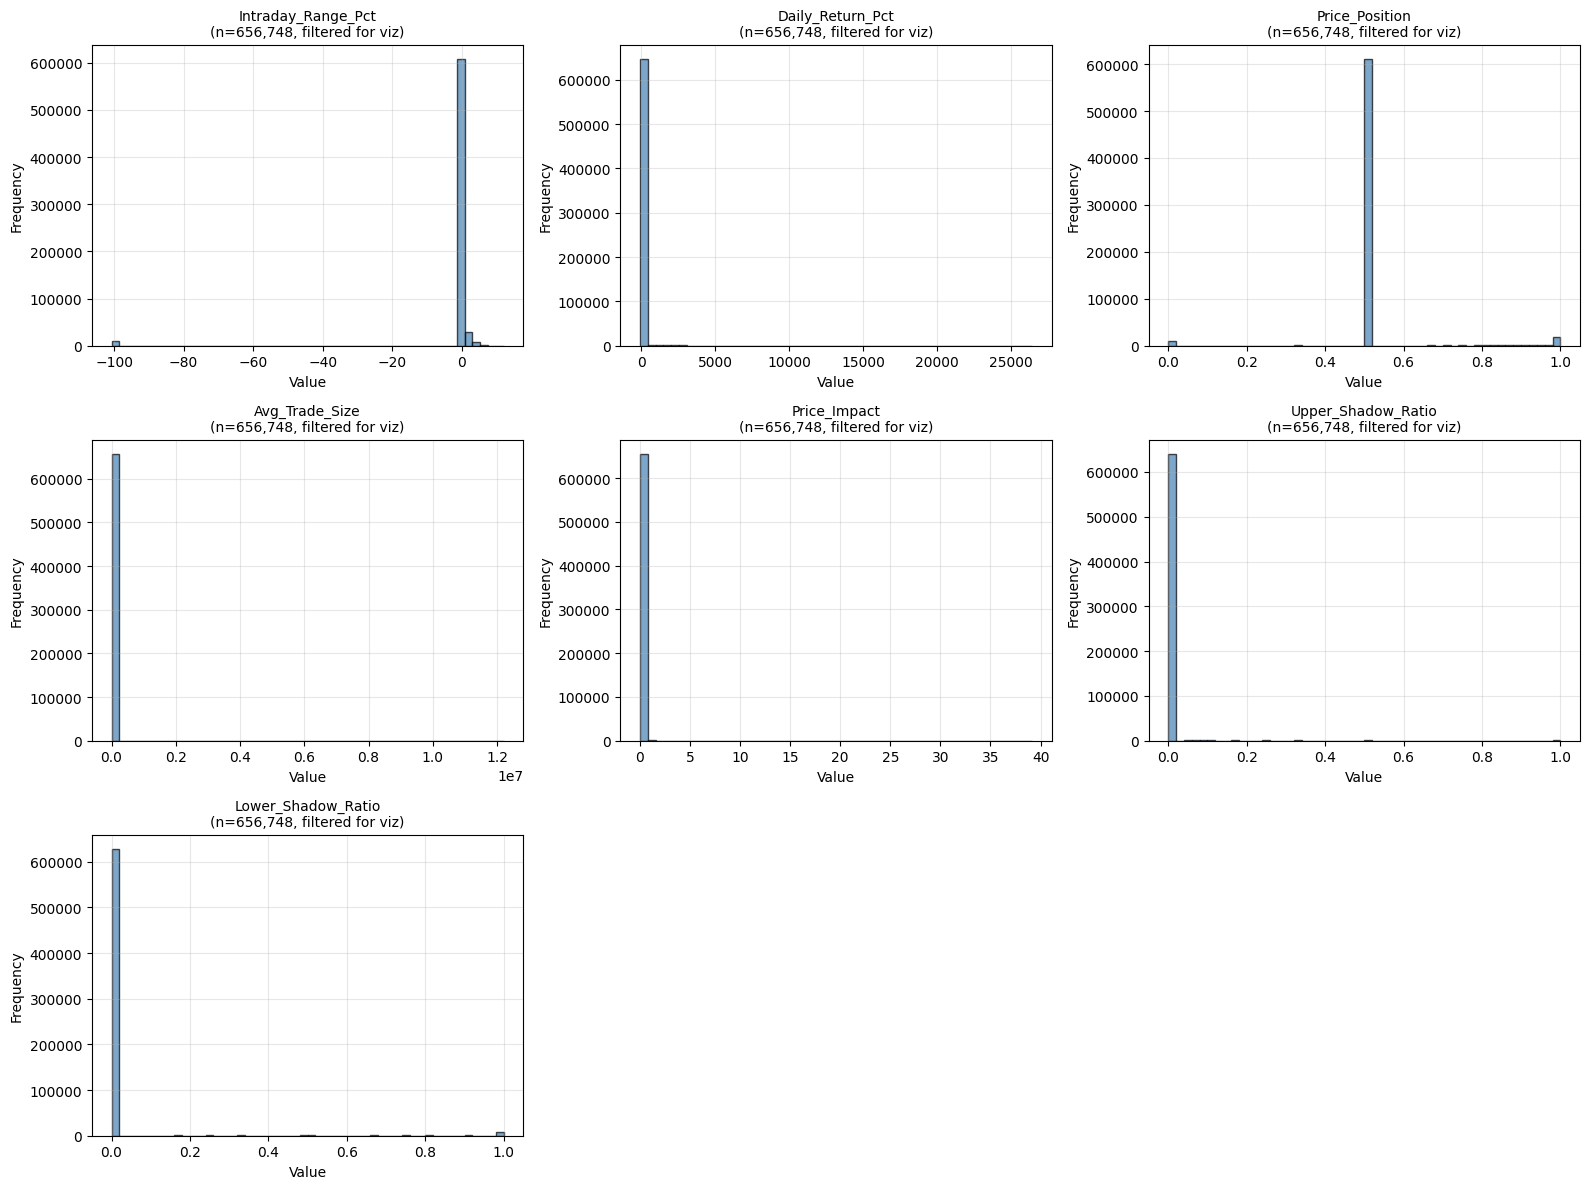

In [28]:
# Visualize the new financial features
fig, axes = plt.subplots(3, 3, figsize=(16, 12))
axes = axes.flatten()

feature_cols = ['Intraday_Range_Pct', 'Daily_Return_Pct', 'Price_Position', 
                'Avg_Trade_Size', 'Price_Impact', 'Upper_Shadow_Ratio', 'Lower_Shadow_Ratio']

for idx, col in enumerate(feature_cols):
    if len(dataset) > 0:
        axes[idx].hist(dataset[col], bins=50, edgecolor='black', alpha=0.7, color='steelblue')
        axes[idx].set_title(f'{col}\n(n={len(dataset):,}, filtered for viz)', fontsize=10)
        axes[idx].set_xlabel('Value')
        axes[idx].set_ylabel('Frequency')
        axes[idx].grid(alpha=0.3)

# Remove unused subplot
axes[-2].axis('off')
axes[-1].axis('off')

plt.tight_layout()
plt.show()

**Created 7 domain-specific financial features for anomaly detection:**

| Feature | Purpose | Anomaly Signals |
|---------|---------|-----------------|
| **Intraday_Range_Pct** | Measures daily volatility as % of closing price | High values indicate unusual price swings, potential manipulation |
| **Daily_Return_Pct** | Daily price change (open to close) | Extreme positive/negative returns signal unusual moves |
| **Price_Position** | Where close sits in daily range (0-1 scale) | Values near 0 or 1 indicate strong directional pressure |
| **Avg_Trade_Size** | Average shares per transaction | Unusually large values = block trades, institutional activity |
| **Price_Impact** | Price movement per unit volume | High values = low liquidity or potential manipulation |
| **Upper_Shadow_Ratio** | Upper wick size (bearish rejection) | Large upper shadows = failed rally attempts |
| **Lower_Shadow_Ratio** | Lower wick size (bullish rejection) | Large lower shadows = successful defense of support |

**Key Observations:**
- Most features show **highly concentrated distributions around zero** (typical for non-trading days)
- Features with high missing values are due to **zero range days** (PLUS_HAUT = PLUS_BAS)
- Extreme outliers are **preserved** - they are the anomalies we want to detect
- These features capture **price action patterns** independent of time series

## Feature Engineering - Time Series Features

In [29]:
# Sort by CODE and SEANCE for proper time series operations
dataset = dataset.sort_values(['CODE', 'SEANCE']).reset_index(drop=True)

# === 1. TREND FEATURES ===
print("Creating trend features...")

# Time step (trading day index per CODE)
dataset['Time_Step'] = dataset.groupby('CODE').cumcount() + 1

# Moving Averages on CLOTURE (grouped by CODE)
for window in [5, 10, 20]:
    dataset[f'MA_{window}'] = dataset.groupby('CODE')['CLOTURE'].transform(
        lambda x: x.rolling(window=window, min_periods=1).mean()
    )

# MA ratios (price relative to moving average)
dataset['Price_to_MA5'] = dataset['CLOTURE'] / dataset['MA_5'].replace(0, np.nan)
dataset['Price_to_MA20'] = dataset['CLOTURE'] / dataset['MA_20'].replace(0, np.nan)
dataset[['Price_to_MA5', 'Price_to_MA20']] = dataset[['Price_to_MA5', 'Price_to_MA20']].fillna(1)

print(f"✓ Trend features: Time_Step, MA_5, MA_10, MA_20, Price_to_MA5, Price_to_MA20")

Creating trend features...
✓ Trend features: Time_Step, MA_5, MA_10, MA_20, Price_to_MA5, Price_to_MA20


In [30]:
# === 2. SEASONALITY FEATURES ===
print("Creating seasonality features...")

# Calendar features from SEANCE
dataset['DayOfWeek'] = dataset['SEANCE'].dt.dayofweek  # 0=Monday, 4=Friday
dataset['Month'] = dataset['SEANCE'].dt.month
dataset['Quarter'] = dataset['SEANCE'].dt.quarter
dataset['WeekOfYear'] = dataset['SEANCE'].dt.isocalendar().week.astype(int)

# Fourier features for yearly seasonality (period=252 trading days)
period = 252  # Approximate trading days per year
dataset['Day_of_Year'] = dataset['SEANCE'].dt.dayofyear

for k in [1, 2, 3]:  # 3 Fourier pairs
    dataset[f'sin_{k}_yearly'] = np.sin(2 * np.pi * k * dataset['Day_of_Year'] / period)
    dataset[f'cos_{k}_yearly'] = np.cos(2 * np.pi * k * dataset['Day_of_Year'] / period)

print(f"✓ Seasonality features: DayOfWeek, Month, Quarter, WeekOfYear, Fourier (3 pairs)")

Creating seasonality features...
✓ Seasonality features: DayOfWeek, Month, Quarter, WeekOfYear, Fourier (3 pairs)


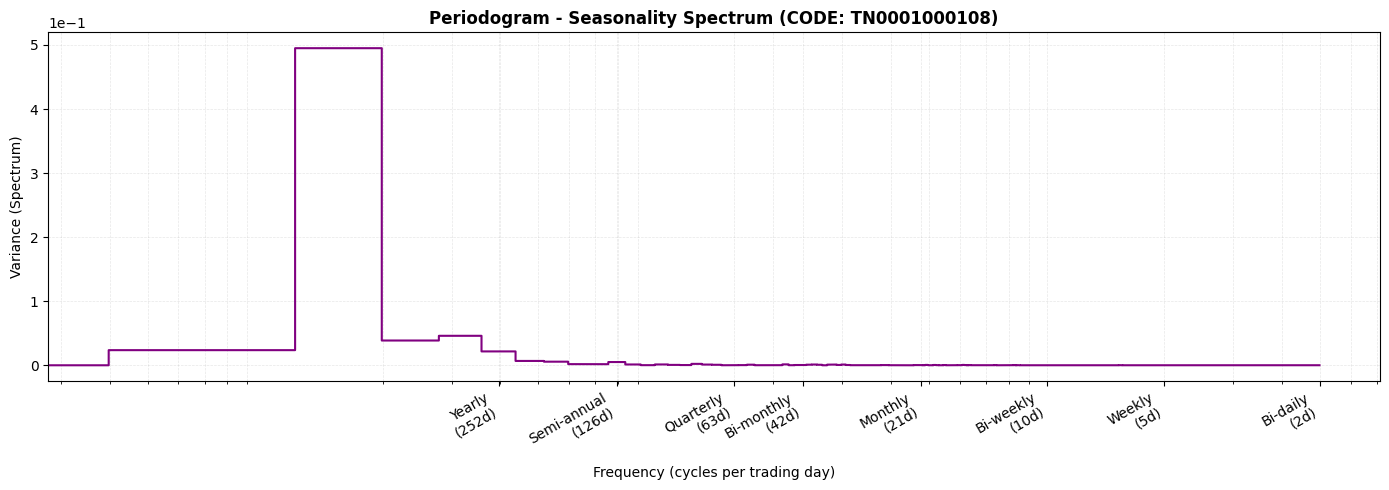

In [31]:
# === 3. PERIODOGRAM - Visualize Seasonality ===

# Use a representative stock with full history for periodogram
top_code = dataset.groupby('CODE').size().idxmax()
sample_data = dataset[dataset['CODE'] == top_code]['CLOTURE'].values

# Compute periodogram with detrending and spectrum scaling
frequencies, spectrum = signal.periodogram(
    sample_data,
    fs=1.0,  # 1 sample per trading day
    detrend='linear',
    window='boxcar',
    scaling='spectrum'
)

fig, ax = plt.subplots(figsize=(14, 5))

# Histogram-style step plot
ax.step(frequencies, spectrum, color='purple', where='mid', linewidth=1.5)

# Log scale on x-axis for better visualization of periods
ax.set_xscale('log')

# Set ticks at meaningful frequencies for trading days
# frequency = 1/period, so freq=1/252 is yearly, 1/63 is quarterly, etc.
ax.set_xticks([1/252, 1/126, 1/63, 1/42, 1/21, 1/10, 1/5, 1/2])
ax.set_xticklabels([
    'Yearly\n(252d)',
    'Semi-annual\n(126d)',
    'Quarterly\n(63d)',
    'Bi-monthly\n(42d)',
    'Monthly\n(21d)',
    'Bi-weekly\n(10d)',
    'Weekly\n(5d)',
    'Bi-daily\n(2d)'
], rotation=30, ha='right')

ax.ticklabel_format(axis='y', style='sci', scilimits=(0, 0))
ax.set_ylabel('Variance (Spectrum)')
ax.set_xlabel('Frequency (cycles per trading day)')
ax.set_title(f'Periodogram - Seasonality Spectrum (CODE: {top_code})', fontweight='bold')
ax.grid(alpha=0.3, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()

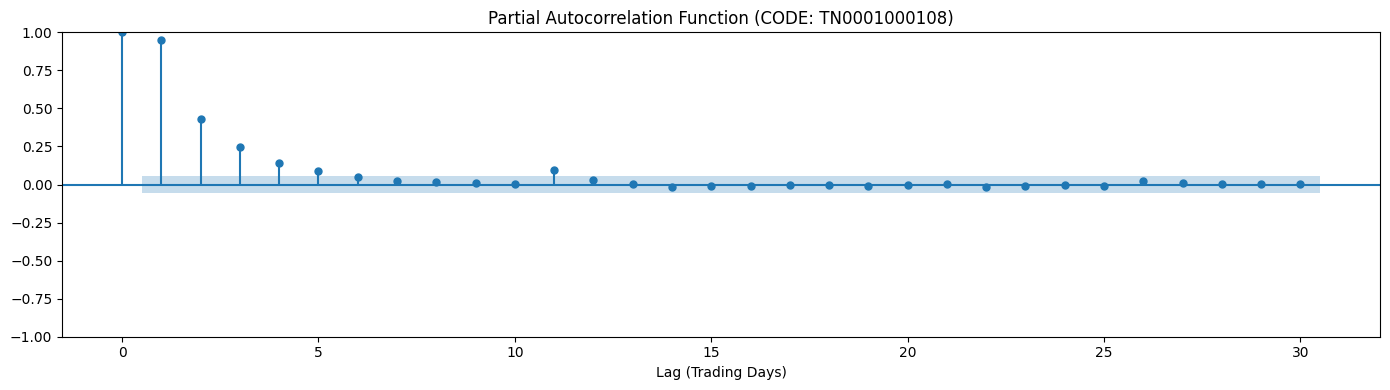

PACF shows significant lags - use lags where bars exceed confidence interval


In [32]:
# === 4. PACF PLOT - Determine Optimal Lags ===
fig, ax = plt.subplots(figsize=(14, 4))
plot_pacf(sample_data, lags=30, ax=ax, method='ywm')
ax.set_title(f'Partial Autocorrelation Function (CODE: {top_code})')
ax.set_xlabel('Lag (Trading Days)')
plt.tight_layout()
plt.show()

print("PACF shows significant lags - use lags where bars exceed confidence interval")

In [33]:
# === 5. LAG FEATURES (Cycles) ===
print("Creating lag features...")

# Based on PACF, create lags 1, 2, 3, 5 (common significant lags for daily stock data)
lag_values = [1, 2, 3, 4, 5]

for lag in lag_values:
    # Lagged closing price
    dataset[f'CLOTURE_lag_{lag}'] = dataset.groupby('CODE')['CLOTURE'].shift(lag)
    
    # Lagged volume
    dataset[f'VOLUME_lag_{lag}'] = dataset.groupby('CODE')['QUANTITE_NEGOCIEE'].shift(lag)

# Price change from lag (momentum indicator)
dataset['Return_1d'] = dataset.groupby('CODE')['CLOTURE'].pct_change(1).fillna(0)
dataset['Return_5d'] = dataset.groupby('CODE')['CLOTURE'].pct_change(5).fillna(0)

# Replace inf/-inf with NaN, then fill with 0
dataset['Return_1d'] = dataset['Return_1d'].replace([np.inf, -np.inf], np.nan).fillna(0)
dataset['Return_5d'] = dataset['Return_5d'].replace([np.inf, -np.inf], np.nan).fillna(0)

# Fill NaN lags with 0 (beginning of series)
lag_cols = [c for c in dataset.columns if '_lag_' in c]
dataset[lag_cols] = dataset[lag_cols].fillna(0)

print(f"✓ Lag features: {len(lag_cols)} lag columns + Return_1d, Return_5d")

Creating lag features...
✓ Lag features: 10 lag columns + Return_1d, Return_5d


In [34]:
# === SUMMARY ===
ts_features = ['Time_Step', 'MA_5', 'MA_10', 'MA_20', 'Price_to_MA5', 'Price_to_MA20',
               'DayOfWeek', 'Month', 'Quarter', 'WeekOfYear',
               'sin_1_yearly', 'cos_1_yearly', 'sin_2_yearly', 'cos_2_yearly', 
               'sin_3_yearly', 'cos_3_yearly',
               'CLOTURE_lag_1', 'CLOTURE_lag_2', 'CLOTURE_lag_3', 'CLOTURE_lag_4', 'CLOTURE_lag_5',
               'VOLUME_lag_1', 'VOLUME_lag_2', 'VOLUME_lag_3', 'VOLUME_lag_4', 'VOLUME_lag_5',
               'Return_1d', 'Return_5d']

print(f"\n{'='*70}")
print(f"TIME SERIES FEATURE ENGINEERING COMPLETE")
print(f"{'='*70}")
print(f"Total new features: {len(ts_features)}")
print(f"Dataset shape: {dataset.shape}")
display(dataset[ts_features].describe().T[['mean', 'std', 'min', '50%', 'max']])


TIME SERIES FEATURE ENGINEERING COMPLETE
Total new features: 28
Dataset shape: (656748, 47)


,mean,std,min,50%,max
Time_Step,504.239635,343.346873,1.0,454.0,1257.0
MA_5,43.654978,46.448464,0.0,10.98,236.34
MA_10,43.65214,46.442623,0.0,10.974,234.87
MA_20,43.665785,46.457938,0.0,10.96325,231.193
Price_to_MA5,1.000371,0.101427,0.0,1.0,4.9
Price_to_MA20,1.001152,0.104611,0.0,1.0,10.466019
DayOfWeek,1.995764,1.417458,0.0,2.0,4.0
Month,6.53766,3.475918,1.0,7.0,12.0
Quarter,2.510694,1.124656,1.0,3.0,4.0
WeekOfYear,26.474923,15.16357,1.0,27.0,52.0


## Sample Visualization

Selected 9 random stocks for visualization:
1. CODE: TN0007130032 | VALEUR: GIF DA 1/11 160209 | Days tracked: 973
2. CODE: TNSGMJ2RHKP1 | VALEUR: MAG NS J 01012023  | Days tracked: 36
3. CODE: TN0007270036 | VALEUR: DA TPR 11/149 2006 | Days tracked: 1257
4. CODE: TN0001300680 | VALEUR: BTEB0127 11,5%P7-2 | Days tracked: 1000
5. CODE: TN0004201117 | VALEUR: CIL DA 1/5 301208 | Days tracked: 1257
6. CODE: TN0007680010 | VALEUR: ASS MULTI ITTIHAD | Days tracked: 1257
7. CODE: TN0007570013 | VALEUR: EURO-CYCLES | Days tracked: 1257
8. CODE: TN0007200173 | VALEUR: WIBIA0624 10.25%P5 | Days tracked: 625
9. CODE: TNWL1ODSWXK1 | VALEUR: ENT3 22 T+2,15%APP | Days tracked: 752


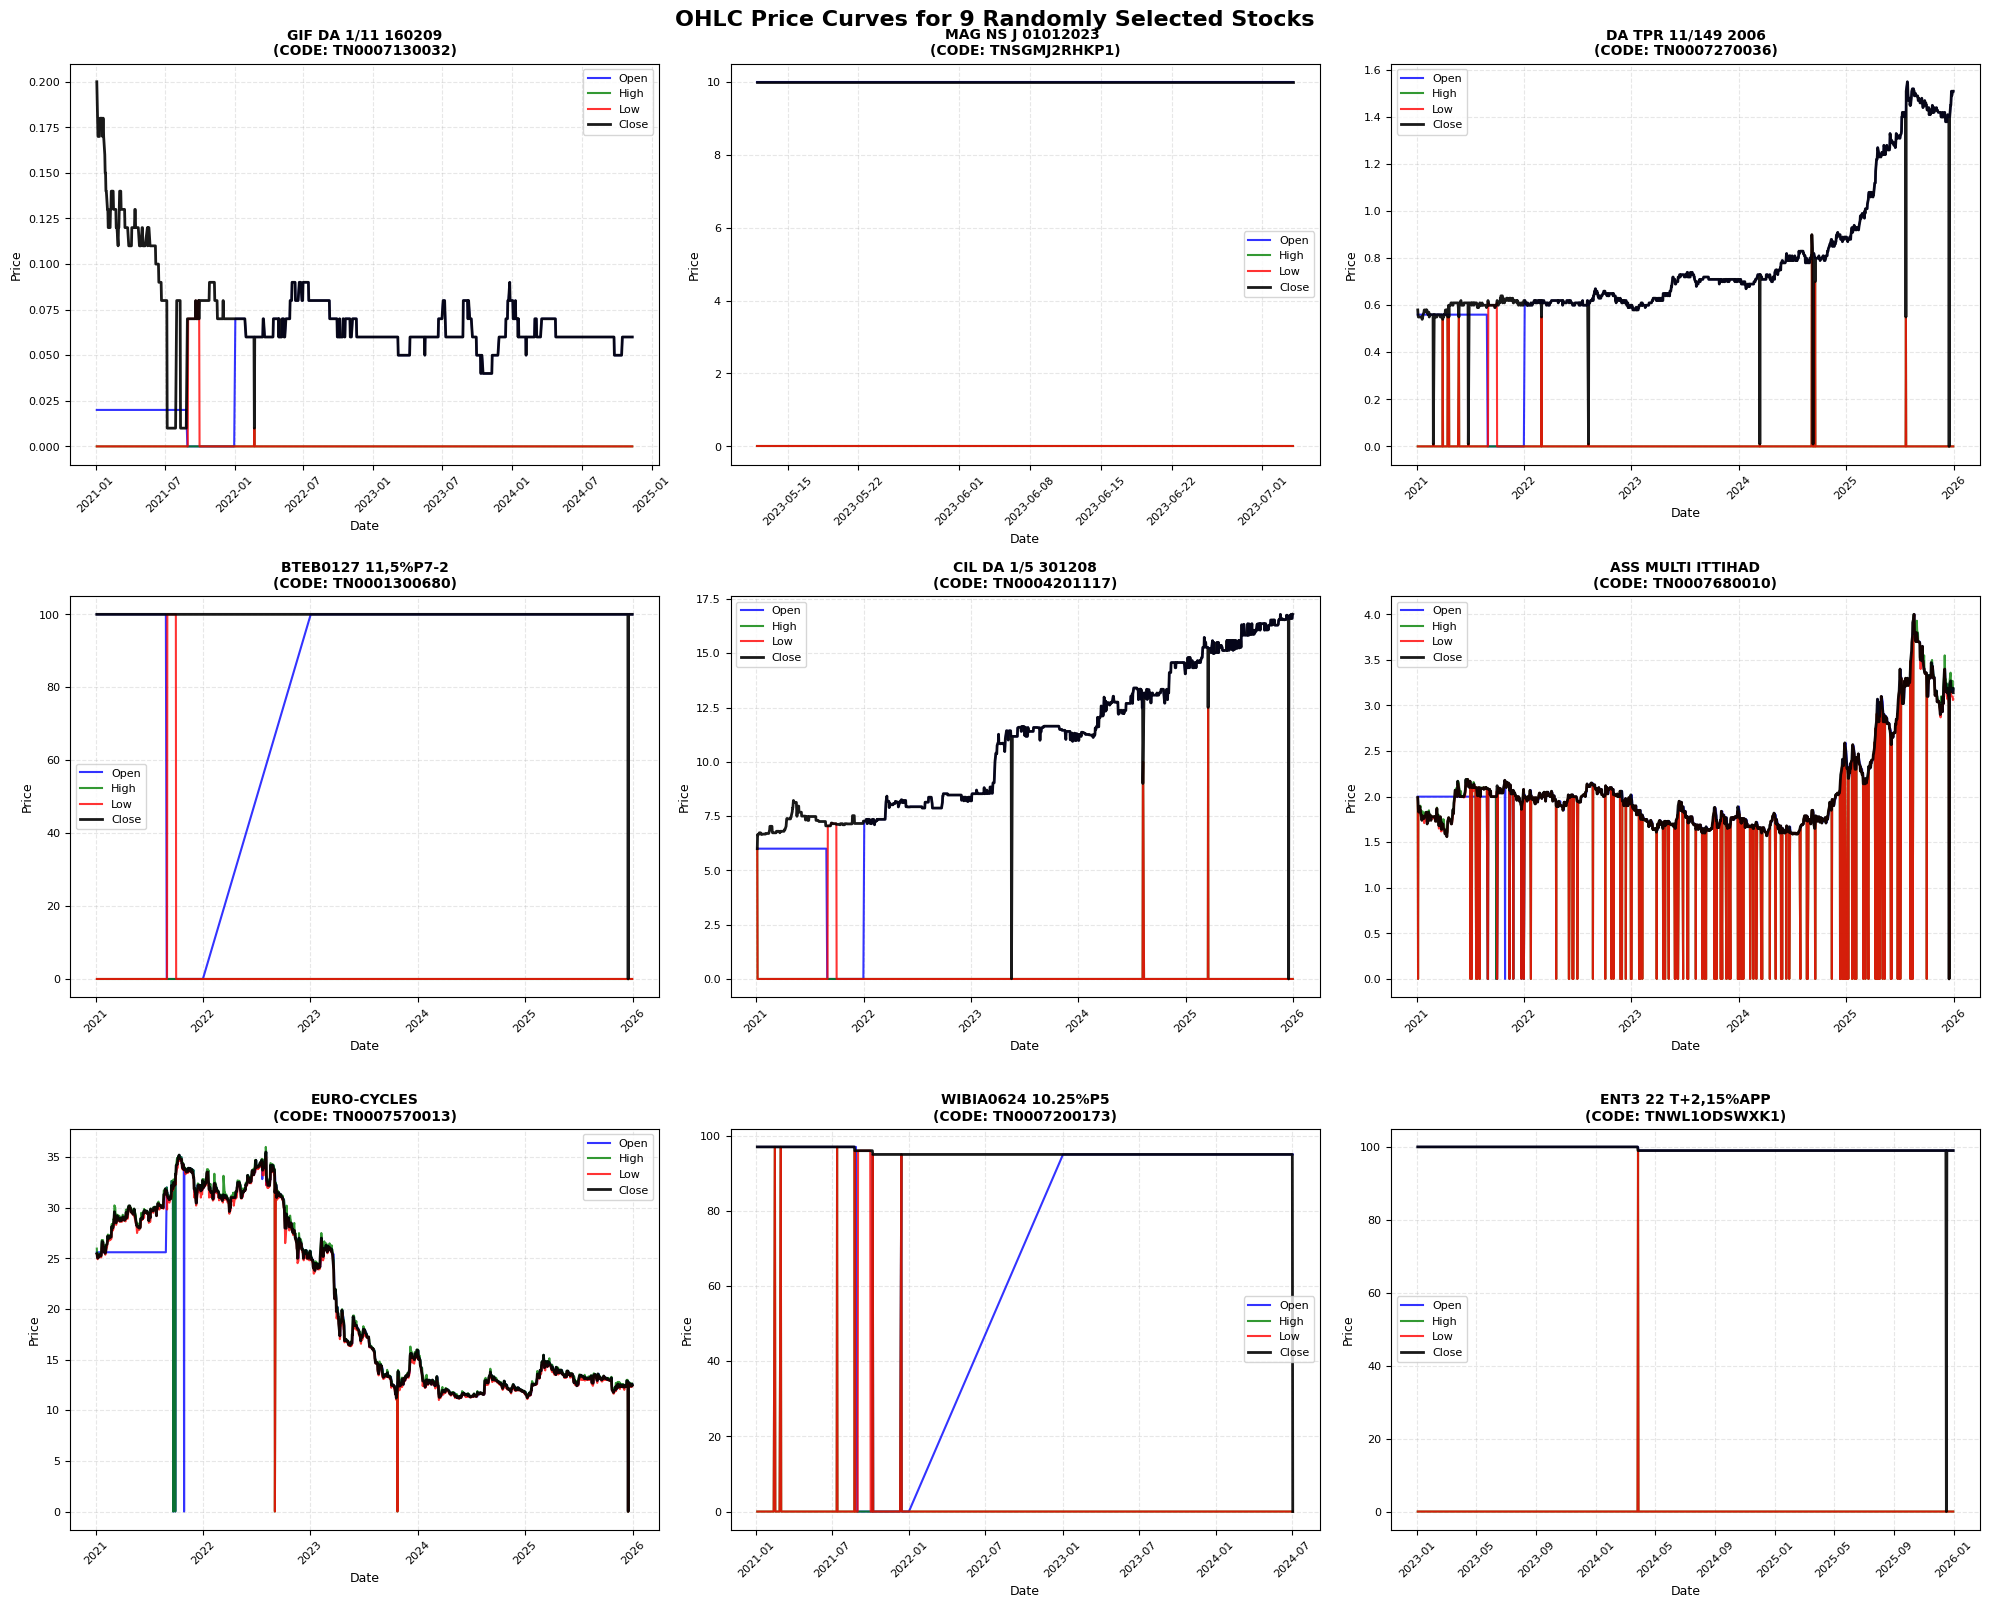

In [35]:
# Get all unique CODEs
all_codes = dataset['CODE'].unique()

# Randomly sample 9 codes
random.seed(0)  # For reproducibility
selected_codes = random.sample(list(all_codes), min(9, len(all_codes)))

print(f"Selected {len(selected_codes)} random stocks for visualization:")
for i, code in enumerate(selected_codes, 1):
    stock_data = dataset[dataset['CODE'] == code]
    valeur = stock_data['VALEUR'].iloc[0]
    n_days = len(stock_data)
    print(f"{i}. CODE: {code} | VALEUR: {valeur} | Days tracked: {n_days}")

# Create 3x3 subplot grid
fig, axes = plt.subplots(3, 3, figsize=(20, 16))
axes = axes.flatten()

# Plot each stock
for idx, code in enumerate(selected_codes):
    # Filter data for this CODE
    stock_data = dataset[dataset['CODE'] == code].sort_values('SEANCE').reset_index(drop=True)
    
    # Get stock name
    valeur = stock_data['VALEUR'].iloc[0]
    
    # Plot OHLC curves
    axes[idx].plot(stock_data['SEANCE'], stock_data['OUVERTURE'], 
                   label='Open', color='blue', linewidth=1.5, alpha=0.8)
    axes[idx].plot(stock_data['SEANCE'], stock_data['PLUS_HAUT'], 
                   label='High', color='green', linewidth=1.5, alpha=0.8)
    axes[idx].plot(stock_data['SEANCE'], stock_data['PLUS_BAS'], 
                   label='Low', color='red', linewidth=1.5, alpha=0.8)
    axes[idx].plot(stock_data['SEANCE'], stock_data['CLOTURE'], 
                   label='Close', color='black', linewidth=2, alpha=0.9)
    
    # Formatting
    axes[idx].set_title(f'{valeur}\n(CODE: {code})', fontsize=10, fontweight='bold')
    axes[idx].set_xlabel('Date', fontsize=9)
    axes[idx].set_ylabel('Price', fontsize=9)
    axes[idx].legend(loc='best', fontsize=8)
    axes[idx].grid(alpha=0.3, linestyle='--')
    axes[idx].tick_params(axis='x', rotation=45, labelsize=8)
    axes[idx].tick_params(axis='y', labelsize=8)

plt.tight_layout()
plt.suptitle('OHLC Price Curves for 9 Randomly Selected Stocks', 
             fontsize=16, fontweight='bold', y=1.002)
plt.show()

In [36]:
# Collect detailed statistics for each stock in a DataFrame
print("\n" + "="*80)
print("DETAILED STATISTICS FOR SELECTED STOCKS")
print("="*80)

stats_list = []

for code in selected_codes:
    stock_data = dataset[dataset['CODE'] == code]
    valeur = stock_data['VALEUR'].iloc[0]
    
    stats_dict = {
        'Stock Name': valeur,
        'CODE': code,
        'Start Date': stock_data['SEANCE'].min().strftime('%Y-%m-%d'),
        'End Date': stock_data['SEANCE'].max().strftime('%Y-%m-%d'),
        'Trading Days': len(stock_data),
        'Min Price': f"{stock_data['CLOTURE'].min():.2f}",
        'Max Price': f"{stock_data['CLOTURE'].max():.2f}",
        'Mean Close': f"{stock_data['CLOTURE'].mean():.2f}",
        'Total Volume': f"{stock_data['QUANTITE_NEGOCIEE'].sum():,.0f}"
    }
    stats_list.append(stats_dict)

# Create DataFrame and display
stats_df = pd.DataFrame(stats_list)
display(stats_df)


DETAILED STATISTICS FOR SELECTED STOCKS


,Stock Name,CODE,Start Date,End Date,Trading Days,Min Price,Max Price,Mean Close,Total Volume
0,GIF DA 1/11 160209,TN0007130032,2021-01-04,2024-11-11,973,0.01,0.20,0.07,10
1,MAG NS J 01012023,TNSGMJ2RHKP1,2023-05-12,2023-07-04,36,10.00,10.00,10.00,0
2,DA TPR 11/149 2006,TN0007270036,2021-01-04,2025-12-31,1257,0.00,1.55,0.78,378
3,"BTEB0127 11,5%P7-2",TN0001300680,2021-01-04,2025-12-31,1000,0.00,100.00,99.90,0
4,CIL DA 1/5 301208,TN0004201117,2021-01-04,2025-12-31,1257,0.00,16.79,10.83,15
5,ASS MULTI ITTIHAD,TN0007680010,2021-01-04,2025-12-31,1257,0.00,4.00,2.08,"11,317,841"
6,EURO-CYCLES,TN0007570013,2021-01-04,2025-12-31,1257,0.00,35.50,20.86,"7,591,202"
7,WIBIA0624 10.25%P5,TN0007200173,2021-01-04,2024-07-02,625,0.00,97.00,95.40,"1,785"
8,"ENT3 22 T+2,15%APP",TNWL1ODSWXK1,2023-01-02,2025-12-31,752,0.00,100.00,99.28,"21,000"


Selected Stock: BTDA1/7(3/12/01) (CODE: TN0002200251)
Period: 2021-01-04 to 2025-12-31
Trading Days: 1257



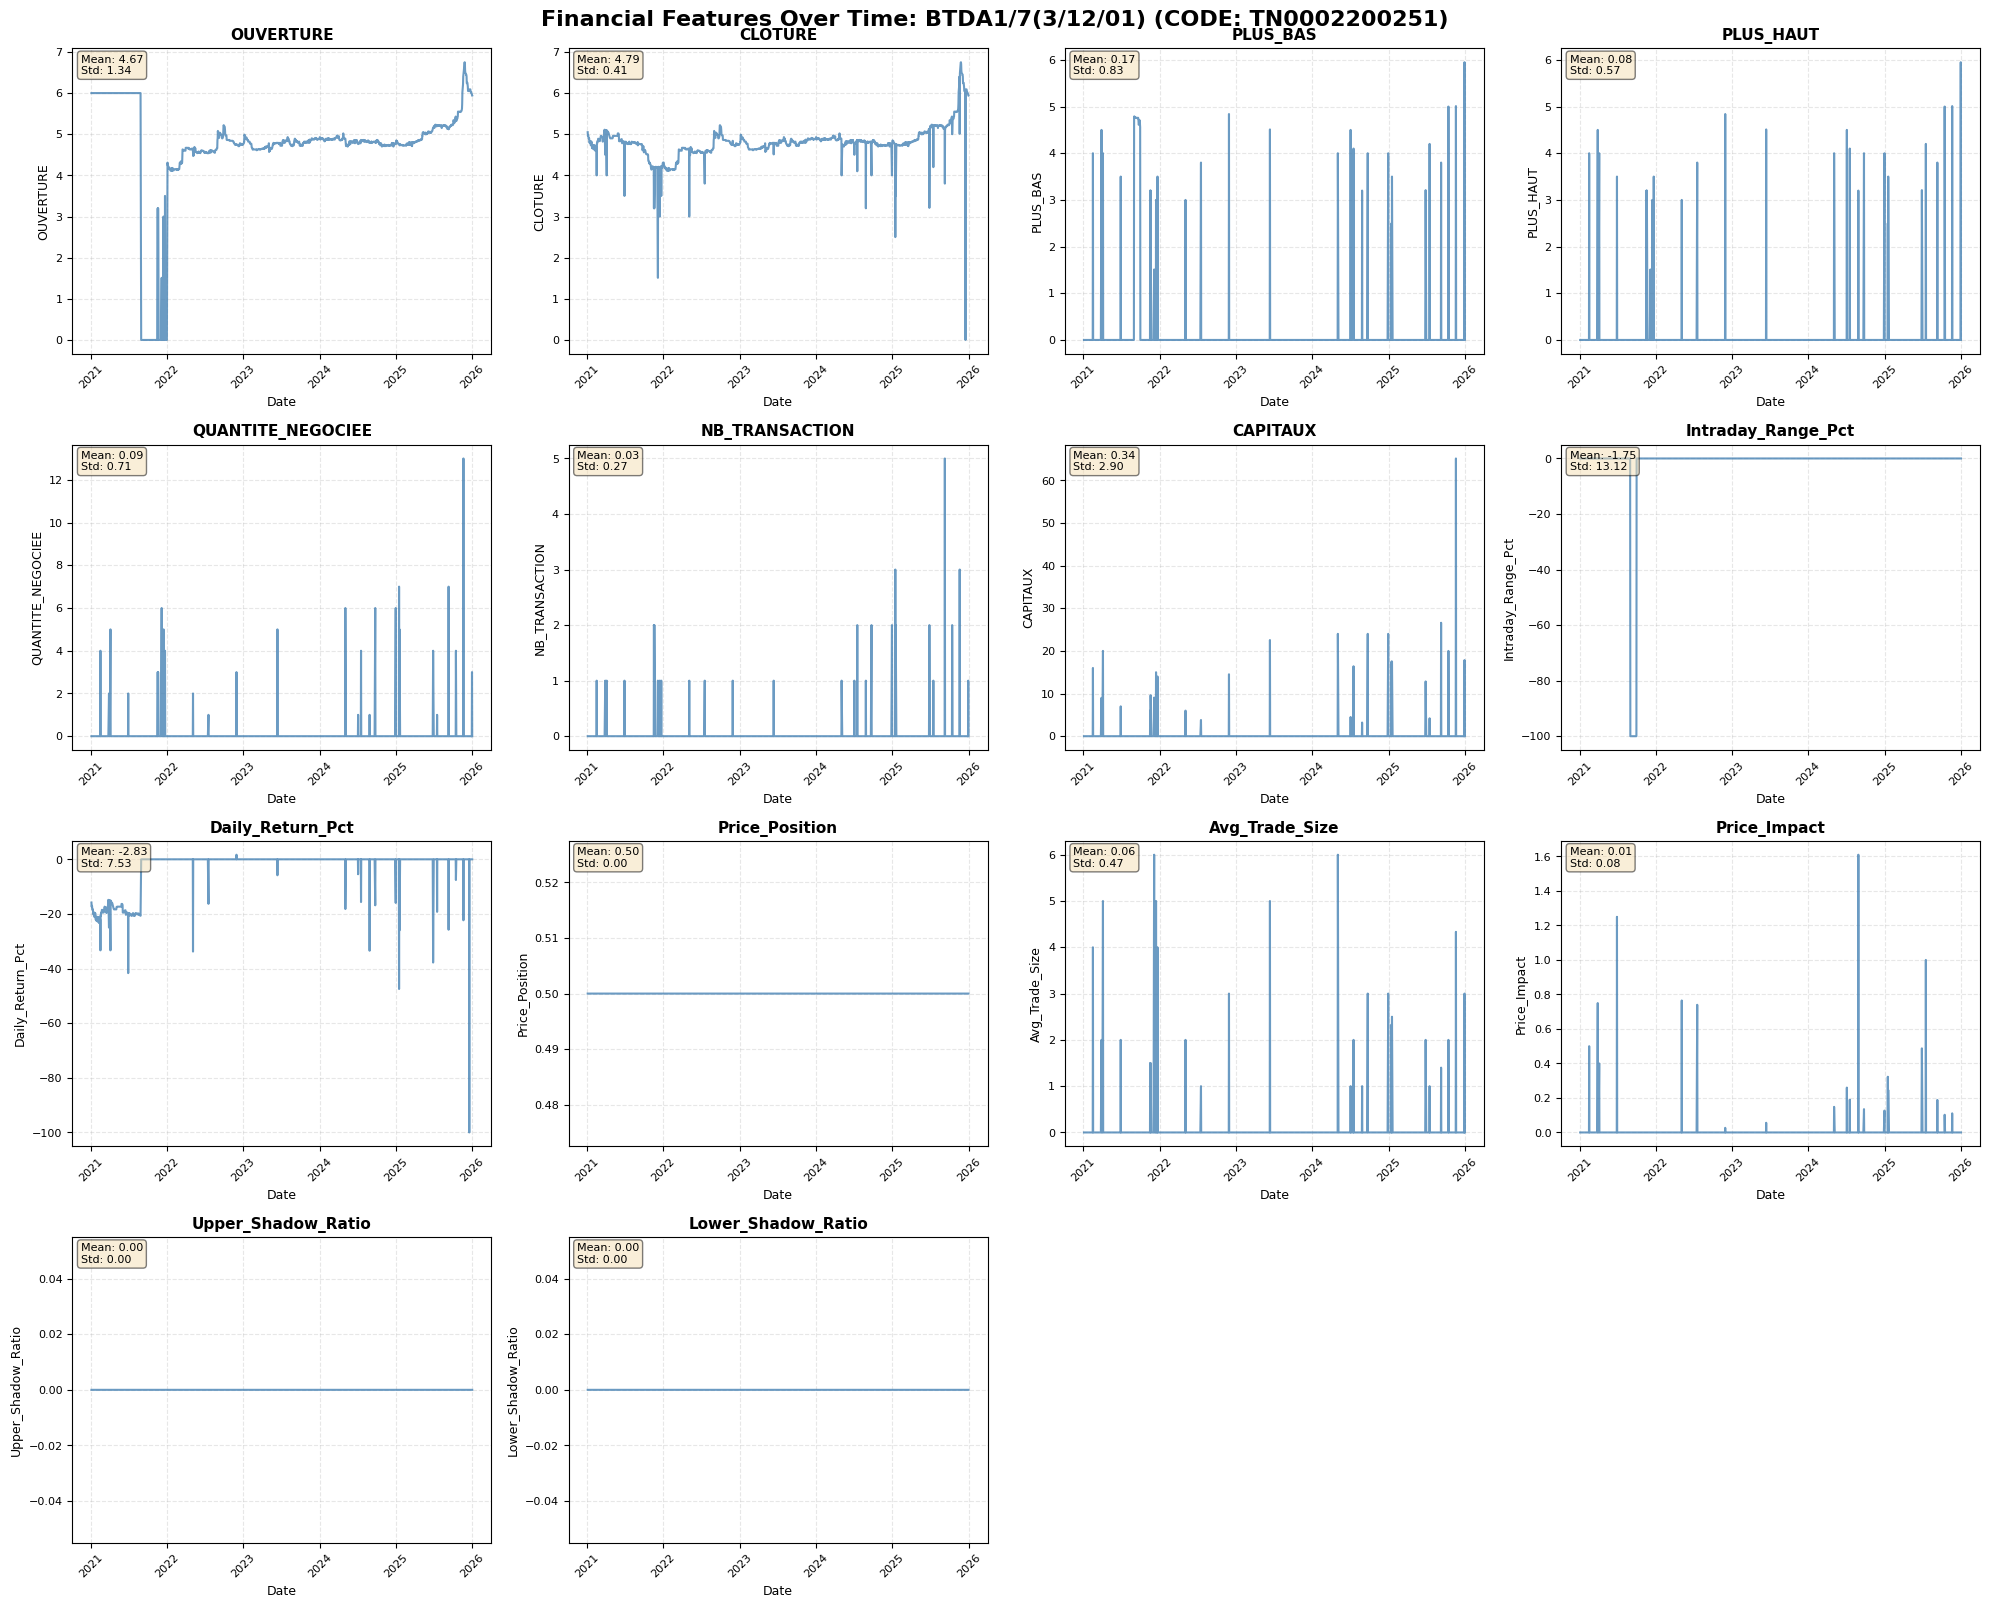

In [37]:
# Select one random CODE
random.seed(1)
selected_code = random.choice(list(dataset['CODE'].unique()))
stock_data = dataset[dataset['CODE'] == selected_code].sort_values('SEANCE').reset_index(drop=True)

valeur = stock_data['VALEUR'].iloc[0]
print(f"Selected Stock: {valeur} (CODE: {selected_code})")
print(f"Period: {stock_data['SEANCE'].min().strftime('%Y-%m-%d')} to {stock_data['SEANCE'].max().strftime('%Y-%m-%d')}")
print(f"Trading Days: {len(stock_data)}\n")

# Define all financial features to plot (original + engineered, excluding time series)
financial_features = [
    # Original OHLC
    'OUVERTURE', 'CLOTURE', 'PLUS_BAS', 'PLUS_HAUT',
    # Original Volume/Transaction data
    'QUANTITE_NEGOCIEE', 'NB_TRANSACTION', 'CAPITAUX',
    # Engineered financial features
    'Intraday_Range_Pct', 'Daily_Return_Pct', 'Price_Position',
    'Avg_Trade_Size', 'Price_Impact', 'Upper_Shadow_Ratio', 'Lower_Shadow_Ratio'
]

# Create subplot grid (4 rows x 4 columns = 16 plots for 14 features)
fig, axes = plt.subplots(4, 4, figsize=(20, 16))
axes = axes.flatten()

# Plot each feature
for idx, feature in enumerate(financial_features):
    axes[idx].plot(stock_data['SEANCE'], stock_data[feature], 
                   color='steelblue', linewidth=1.5, alpha=0.8)
    
    axes[idx].set_title(f'{feature}', fontsize=11, fontweight='bold')
    axes[idx].set_xlabel('Date', fontsize=9)
    axes[idx].set_ylabel(feature, fontsize=9)
    axes[idx].grid(alpha=0.3, linestyle='--')
    axes[idx].tick_params(axis='x', rotation=45, labelsize=8)
    axes[idx].tick_params(axis='y', labelsize=8)
    
    # Add statistics annotation
    mean_val = stock_data[feature].mean()
    std_val = stock_data[feature].std()
    stats_text = f'Mean: {mean_val:.2f}\nStd: {std_val:.2f}'
    axes[idx].text(0.02, 0.98, stats_text, 
                   transform=axes[idx].transAxes,
                   verticalalignment='top',
                   fontsize=8,
                   bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

# Hide unused subplots
for idx in range(len(financial_features), len(axes)):
    axes[idx].axis('off')

plt.tight_layout()
plt.suptitle(f'Financial Features Over Time: {valeur} (CODE: {selected_code})', 
             fontsize=16, fontweight='bold', y=1.002)
plt.show()

## Anomaly detection

In [38]:
print("=" * 80)
print("ANOMALY DETECTION - ISOLATION FOREST (Per CODE)")
print("=" * 80)

# Define features to use for anomaly detection (financial + time series features)
# Exclude categorical, date, and identifier columns
anomaly_features = [
    # Original numeric features
    'OUVERTURE', 'CLOTURE', 'PLUS_BAS', 'PLUS_HAUT', 
    'QUANTITE_NEGOCIEE', 'NB_TRANSACTION', 'CAPITAUX',
    # Engineered financial features
    'Intraday_Range_Pct', 'Daily_Return_Pct', 'Price_Position',
    'Avg_Trade_Size', 'Price_Impact', 'Upper_Shadow_Ratio', 'Lower_Shadow_Ratio',
    # Time series features
    'MA_5', 'MA_10', 'MA_20', 'Price_to_MA5', 'Price_to_MA20',
    'Return_1d', 'Return_5d',
    'CLOTURE_lag_1', 'CLOTURE_lag_2', 'CLOTURE_lag_3', 'CLOTURE_lag_4', 'CLOTURE_lag_5',
    'VOLUME_lag_1', 'VOLUME_lag_2', 'VOLUME_lag_3', 'VOLUME_lag_4', 'VOLUME_lag_5'
]

# Verify all features exist in dataset
available_features = [f for f in anomaly_features if f in dataset.columns]
print(f"Using {len(available_features)} features for anomaly detection")

# Initialize columns
dataset['ANOMALY_SCORE'] = 0.0
dataset['ANOMALY'] = 0

ANOMALY DETECTION - ISOLATION FOREST (Per CODE)
Using 31 features for anomaly detection


In [39]:
def detect_anomalies_per_code(group):
    """
    Apply Isolation Forest to each CODE group independently.
    Only marks anomalies when there's actual unusual behavior (not forced percentiles).
    """
    code = group['CODE'].iloc[0]
    
    print(f"Processing CODE: {code} (n={len(group)})")

    # Skip if group is too small for meaningful anomaly detection
    if len(group) < 10:
        group['ANOMALY_SCORE'] = 50.0  # Neutral score
        group['ANOMALY'] = 0
        return group
    
    # Prepare features - handle any remaining NaN/inf
    X = group[available_features].copy()
    X = X.replace([np.inf, -np.inf], np.nan).fillna(0)
    
    # Check if there's any variance in the data
    total_variance = X.std().sum()
    if total_variance == 0:
        group['ANOMALY_SCORE'] = 50.0  # Neutral score for flat data
        group['ANOMALY'] = 0
        return group
    
    # ============================================
    # NEW: Check if stock has meaningful activity
    # ============================================
    price_variance = group['CLOTURE'].std()
    volume_variance = group['QUANTITE_NEGOCIEE'].std()
    
    # Define thresholds for "active" stocks (tune these based on your data)
    MIN_PRICE_STD = 0.01  # Minimum price standard deviation
    MIN_VOLUME_STD = 1.5  # Minimum volume standard deviation
    
    is_active = (price_variance > MIN_PRICE_STD) or (volume_variance > MIN_VOLUME_STD)
    
    if not is_active:
        # Stock is dormant/inactive - no real anomalies to detect
        group['ANOMALY_SCORE'] = 50.0  # Neutral score
        group['ANOMALY'] = 0
        print(f"  → Inactive stock (price_std={price_variance:.4f}, vol_std={volume_variance:.4f}) - No anomalies marked")
        return group
    
    # Initialize and fit Isolation Forest
    iso_forest = IsolationForest(
        n_estimators=100,
        contamination='auto',  # Let the algorithm determine
        random_state=42,
        n_jobs=-1
    )
    
    # Fit and get decision function scores
    iso_forest.fit(X)
    decision_scores = iso_forest.decision_function(X)
    
    # Normalize to 0-100 range
    scaler = MinMaxScaler(feature_range=(0, 100))
    inverted_scores = -decision_scores
    normalized_scores = scaler.fit_transform(inverted_scores.reshape(-1, 1)).flatten()
    
    group['ANOMALY_SCORE'] = normalized_scores
    
    # ============================================
    # NEW: Adaptive threshold based on score distribution
    # ============================================
    # Only mark as anomaly if:
    # 1. Score is in top 5% (95th percentile)
    # 2. AND score is significantly higher than median (statistical outlier)
    
    p95_threshold = np.percentile(normalized_scores, 95)
    median_score = np.median(normalized_scores)
    score_std = np.std(normalized_scores)
    
    # Require anomalies to be at least 2 standard deviations above median
    statistical_threshold = median_score + (2 * score_std)
    
    # Use the MORE RESTRICTIVE threshold (higher value)
    final_threshold = max(p95_threshold, statistical_threshold)
    
    group['ANOMALY'] = (normalized_scores >= final_threshold).astype(int)
    
    n_anomalies = group['ANOMALY'].sum()
    print(f"  → Active stock - {n_anomalies} anomalies detected (threshold={final_threshold:.2f})")
    
    return group

In [40]:
# Apply anomaly detection per CODE
print("\nRunning Isolation Forest for each CODE...")
dataset = dataset.groupby('CODE', group_keys=False).apply(detect_anomalies_per_code)

print("\n✓ Anomaly detection complete!")
print(f"\nDataset shape: {dataset.shape}")
print(f"New columns added: ANOMALY_SCORE, ANOMALY")

# Summary statistics
print("\n" + "=" * 80)
print("ANOMALY DETECTION SUMMARY")
print("=" * 80)

total_anomalies = dataset['ANOMALY'].sum()
total_rows = len(dataset)
anomaly_pct = (total_anomalies / total_rows) * 100

print(f"\nTotal records: {total_rows:,}")
print(f"Total anomalies detected: {total_anomalies:,}")
print(f"Anomaly percentage: {anomaly_pct:.2f}%")

print("\nANOMALY_SCORE Statistics:")
display(dataset['ANOMALY_SCORE'].describe().to_frame().T)

print("\nAnomalies per CODE (top 10 by count):")
anomalies_per_code = dataset[dataset['ANOMALY'] == 1].groupby('CODE').size().sort_values(ascending=False).head(10)
display(anomalies_per_code.to_frame(name='Anomaly_Count'))


Running Isolation Forest for each CODE...
Processing CODE: 999999 (n=161)
  → Active stock - 9 anomalies detected (threshold=65.01)
Processing CODE: TN0001000108 (n=1257)
  → Active stock - 56 anomalies detected (threshold=48.86)
Processing CODE: TN0001000116 (n=1257)
  → Active stock - 63 anomalies detected (threshold=39.34)
Processing CODE: TN0001000124 (n=1257)
  → Active stock - 63 anomalies detected (threshold=43.63)
Processing CODE: TN0001000132 (n=1257)
  → Active stock - 63 anomalies detected (threshold=37.79)
Processing CODE: TN0001000140 (n=1257)
  → Active stock - 63 anomalies detected (threshold=56.92)
Processing CODE: TN0001100254 (n=1257)
  → Active stock - 63 anomalies detected (threshold=51.44)
Processing CODE: TN0001100288 (n=1257)
  → Active stock - 63 anomalies detected (threshold=66.84)
Processing CODE: TN0001100296 (n=1257)
  → Active stock - 63 anomalies detected (threshold=60.11)
Processing CODE: TN0001100304 (n=1257)
  → Active stock - 63 anomalies detected (th

C:\Users\louay\AppData\Local\Temp\ipykernel_13772\3387498402.py:3: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  dataset = dataset.groupby('CODE', group_keys=False).apply(detect_anomalies_per_code)


,count,mean,std,min,25%,50%,75%,max
ANOMALY_SCORE,656748.0,15.575646,19.698082,0.0,0.040079,7.087408,23.637803,100.0



Anomalies per CODE (top 10 by count):


,Anomaly_Count
CODE,
TN0002102143,104
TN0002601011,104
TN0008000804,103
TN0008000796,103
TN0007310584,103
TN0007310550,103
TN0003400330,103
TN0001300607,102
TN0001300623,102


In [41]:
print("=" * 80)
print("POST-PROCESSING: Exclude First 5 Days from Anomalies")
print("=" * 80)

# Calculate median anomaly score for each CODE
median_scores_per_code = dataset.groupby('CODE')['ANOMALY_SCORE'].median()

print(f"\nCalculated median anomaly scores for {len(median_scores_per_code)} CODEs")

# Counter for modifications
modified_codes = 0
total_days_modified = 0

# Process each CODE group
for code in dataset['CODE'].unique():
    # Get indices for this CODE (sorted by SEANCE)
    code_mask = dataset['CODE'] == code
    code_indices = dataset[code_mask].sort_values('SEANCE').head(5).index
    
    if len(code_indices) > 0:
        # Get median score for this CODE
        median_score = median_scores_per_code[code]
        
        # Update first 5 days
        dataset.loc[code_indices, 'ANOMALY'] = 0
        dataset.loc[code_indices, 'ANOMALY_SCORE'] = median_score
        
        modified_codes += 1
        total_days_modified += len(code_indices)

print(f"\n✓ Post-processing complete!")
print(f"Modified {modified_codes} CODEs")
print(f"Total days updated: {total_days_modified}")

# Summary statistics after modification
print("\n" + "=" * 80)
print("UPDATED ANOMALY DETECTION SUMMARY")
print("=" * 80)

total_anomalies = dataset['ANOMALY'].sum()
total_rows = len(dataset)
anomaly_pct = (total_anomalies / total_rows) * 100

print(f"\nTotal records: {total_rows:,}")
print(f"Total anomalies detected: {total_anomalies:,}")
print(f"Anomaly percentage: {anomaly_pct:.2f}%")

print("\nANOMALY_SCORE Statistics:")
display(dataset['ANOMALY_SCORE'].describe().to_frame().T)

POST-PROCESSING: Exclude First 5 Days from Anomalies

Calculated median anomaly scores for 825 CODEs

✓ Post-processing complete!
Modified 825 CODEs
Total days updated: 4119

UPDATED ANOMALY DETECTION SUMMARY

Total records: 656,748
Total anomalies detected: 29,803
Anomaly percentage: 4.54%

ANOMALY_SCORE Statistics:


,count,mean,std,min,25%,50%,75%,max
ANOMALY_SCORE,656748.0,15.2624,19.314085,0.0,0.0,6.949469,23.090275,100.0


ANOMALY VISUALIZATION - 5 RANDOM STOCKS (PRICE & VOLUME)

Selected 5 stocks with anomalies for visualization:

1. TJARIDA1/40 250518 (CODE: TN0001600501)
   Total days: 1257, Anomalies: 62 (4.9%)
2. SIAME DA1/8 (CODE: TN0006590087)
   Total days: 1257, Anomalies: 59 (4.7%)
3. TL A0321 7.5% AP5 (CODE: TN0002101889)
   Total days: 42, Anomalies: 2 (4.8%)
4. SAH DA 1/14 250117 (CODE: TN0007610058)
   Total days: 1257, Anomalies: 63 (5.0%)
5. SIAME DA5/11 (CODE: TN0006590020)
   Total days: 1257, Anomalies: 60 (4.8%)


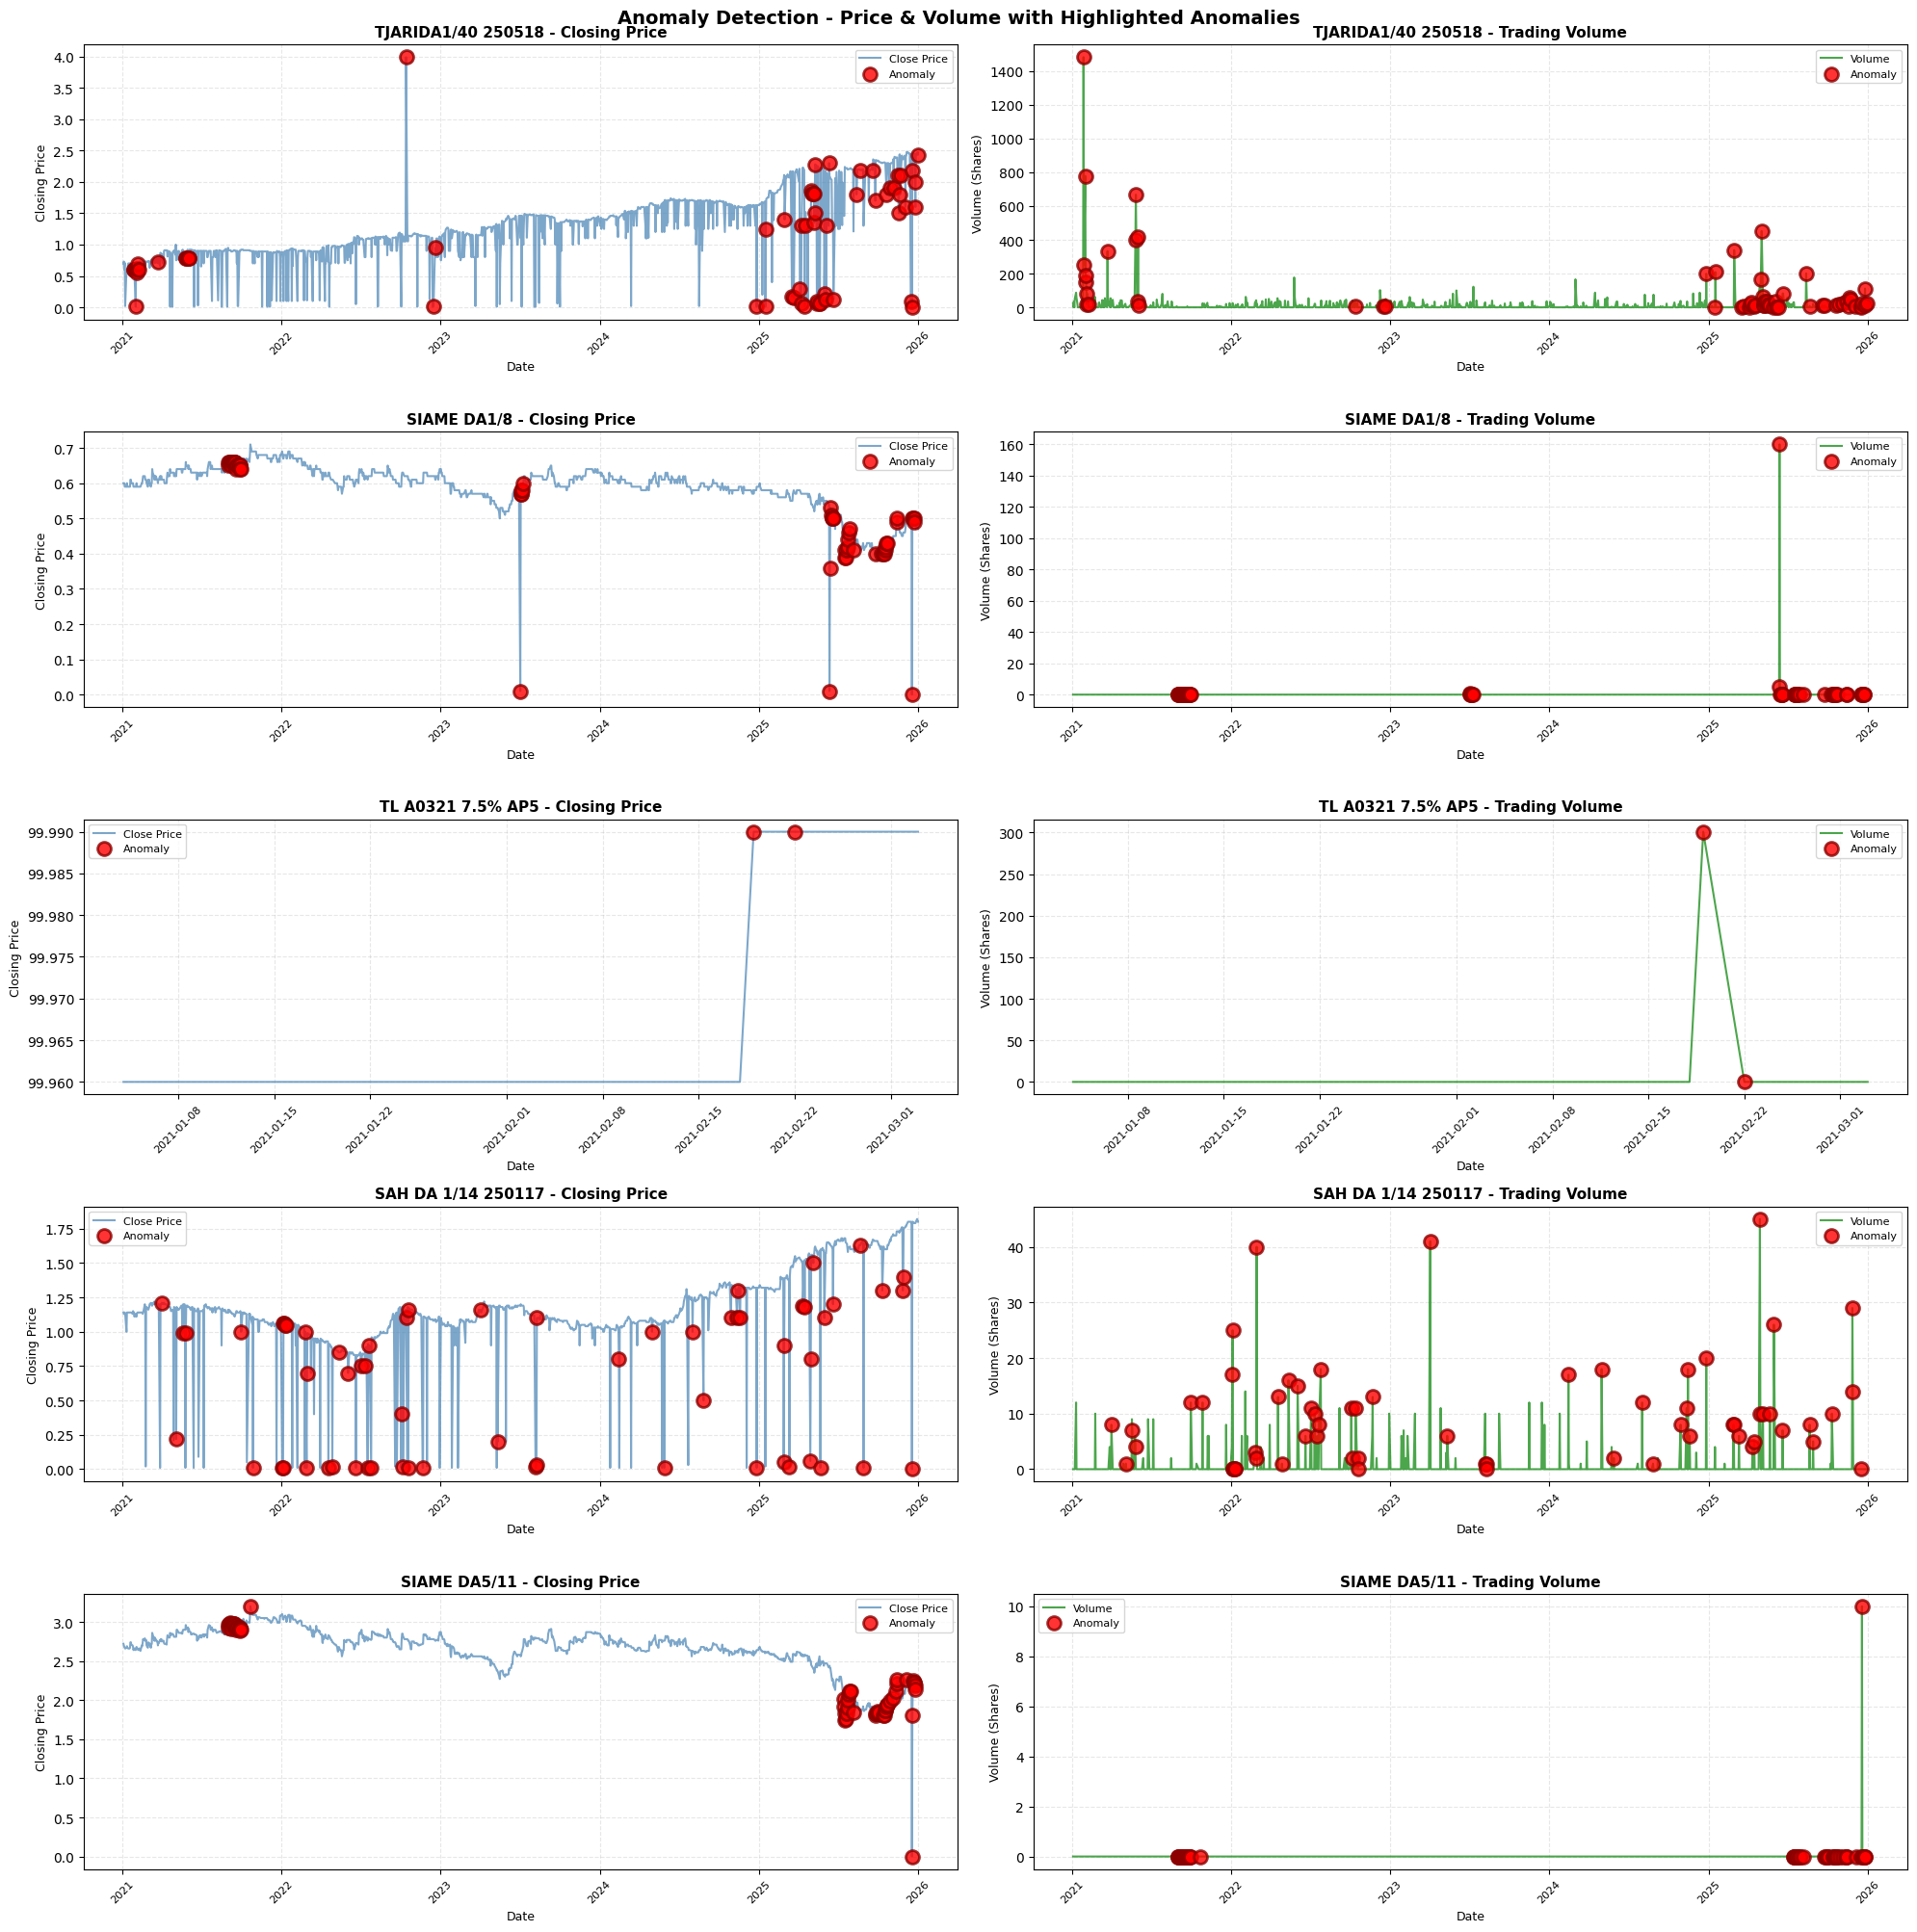


Red circles indicate days flagged as anomalies (same days marked on both plots)


In [42]:
# Visualize anomalies for 5 random stocks (CLOTURE + VOLUME)
print("=" * 80)
print("ANOMALY VISUALIZATION - 5 RANDOM STOCKS (PRICE & VOLUME)")
print("=" * 80)

# Get all unique CODEs that have at least one anomaly
codes_with_anomalies = dataset[dataset['ANOMALY'] == 1]['CODE'].unique()

# Randomly sample 5 codes (or fewer if not enough)
random.seed(123)  # For reproducibility
n_samples = min(5, len(codes_with_anomalies))
selected_codes_viz = random.sample(list(codes_with_anomalies), n_samples)

print(f"\nSelected {n_samples} stocks with anomalies for visualization:\n")

# Create subplots: 5 rows x 2 columns (CLOTURE + VOLUME for each stock)
fig, axes = plt.subplots(n_samples, 2, figsize=(20, 4 * n_samples))

# Handle case where n_samples = 1
if n_samples == 1:
    axes = axes.reshape(1, -1)

for idx, code in enumerate(selected_codes_viz):
    # Filter data for this CODE
    stock_data = dataset[dataset['CODE'] == code].sort_values('SEANCE').reset_index(drop=True)
    valeur = stock_data['VALEUR'].iloc[0]
    
    # Get anomaly data points
    anomaly_data = stock_data[stock_data['ANOMALY'] == 1]
    
    print(f"{idx + 1}. {valeur} (CODE: {code})")
    print(f"   Total days: {len(stock_data)}, Anomalies: {len(anomaly_data)} ({len(anomaly_data)/len(stock_data)*100:.1f}%)")
    
    # ========== LEFT COLUMN: CLOTURE (Price) ==========
    axes[idx, 0].plot(stock_data['SEANCE'], stock_data['CLOTURE'], 
                      color='steelblue', linewidth=1.5, alpha=0.7, label='Close Price')
    
    # Highlight anomaly points with red circles
    if len(anomaly_data) > 0:
        axes[idx, 0].scatter(anomaly_data['SEANCE'], anomaly_data['CLOTURE'],
                            color='red', s=100, marker='o', edgecolors='darkred',
                            linewidths=2, alpha=0.8, label='Anomaly', zorder=5)
    
    # Formatting for CLOTURE plot
    axes[idx, 0].set_title(f'{valeur} - Closing Price', fontsize=11, fontweight='bold')
    axes[idx, 0].set_xlabel('Date', fontsize=9)
    axes[idx, 0].set_ylabel('Closing Price', fontsize=9)
    axes[idx, 0].legend(loc='best', fontsize=8)
    axes[idx, 0].grid(alpha=0.3, linestyle='--')
    axes[idx, 0].tick_params(axis='x', rotation=45, labelsize=8)
    
    # ========== RIGHT COLUMN: VOLUME ==========
    axes[idx, 1].plot(stock_data['SEANCE'], stock_data['QUANTITE_NEGOCIEE'], 
                      color='green', linewidth=1.5, alpha=0.7, label='Volume')
    
    # Highlight anomaly points with red circles on volume
    if len(anomaly_data) > 0:
        axes[idx, 1].scatter(anomaly_data['SEANCE'], anomaly_data['QUANTITE_NEGOCIEE'],
                            color='red', s=100, marker='o', edgecolors='darkred',
                            linewidths=2, alpha=0.8, label='Anomaly', zorder=5)
    
    # Formatting for VOLUME plot
    axes[idx, 1].set_title(f'{valeur} - Trading Volume', fontsize=11, fontweight='bold')
    axes[idx, 1].set_xlabel('Date', fontsize=9)
    axes[idx, 1].set_ylabel('Volume (Shares)', fontsize=9)
    axes[idx, 1].legend(loc='best', fontsize=8)
    axes[idx, 1].grid(alpha=0.3, linestyle='--')
    axes[idx, 1].tick_params(axis='x', rotation=45, labelsize=8)

plt.tight_layout()
plt.suptitle('Anomaly Detection - Price & Volume with Highlighted Anomalies', 
             fontsize=14, fontweight='bold', y=1.001)
plt.show()

print("\n" + "=" * 80)
print("Red circles indicate days flagged as anomalies (same days marked on both plots)")
print("=" * 80)

In [43]:
dataset.head()

,SEANCE,GROUPE,CODE,VALEUR,OUVERTURE,CLOTURE,PLUS_BAS,PLUS_HAUT,QUANTITE_NEGOCIEE,NB_TRANSACTION,...,CLOTURE_lag_3,VOLUME_lag_3,CLOTURE_lag_4,VOLUME_lag_4,CLOTURE_lag_5,VOLUME_lag_5,Return_1d,Return_5d,ANOMALY_SCORE,ANOMALY
0,2021-01-04,32,999999,Autres Lignes,0.0,0.0,0.0,0.0,12231,447,...,0.0,0,0.0,0,0.0,0,0.0,0.0,11.277294,0
1,2021-01-05,32,999999,Autres Lignes,0.0,0.0,0.0,0.0,15767,567,...,0.0,0,0.0,0,0.0,0,0.0,0.0,11.277294,0
2,2021-01-06,32,999999,Autres Lignes,0.0,0.0,0.0,0.0,23580,846,...,0.0,0,0.0,0,0.0,0,0.0,0.0,11.277294,0
3,2021-01-07,32,999999,Autres Lignes,0.0,0.0,0.0,0.0,1034,71,...,0.0,12231,0.0,0,0.0,0,0.0,0.0,11.277294,0
4,2021-01-08,32,999999,Autres Lignes,0.0,0.0,0.0,0.0,3762,113,...,0.0,15767,0.0,12231,0.0,0,0.0,0.0,11.277294,0


In [48]:
# Filter dataset for selected stocks and columns
print("=" * 80)
print("FILTERING DATASET - SELECTED STOCKS ONLY")
print("=" * 80)

# Define selected CODEs
selected_codes = [
    'TN0001100254', 'TN0001600154', 'TN0001800457', 'TN0002200053',
    'TN0002600955', 'TN0003100609', 'TN0006530018', 'TN0006560015',
    'TN0007400013', 'TN0007440019', 'TN0007530017', 'TN0007570013',
    'TN0007610017', 'TN0007630015', 'TN0007720014'
]

# Define columns to keep
columns_to_keep = ['SEANCE', 'VALEUR', 'CODE',
        'OUVERTURE', 'CLOTURE', 'PLUS_HAUT', 'PLUS_BAS',
        'QUANTITE_NEGOCIEE', 'NB_TRANSACTION', 'CAPITAUX', 'GROUPE',
        'ANOMALY', 'ANOMALY_SCORE',
        'Intraday_Range_Pct', 'Daily_Return_Pct', 'Price_Position',
        'Avg_Trade_Size', 'Price_Impact', 'Upper_Shadow_Ratio', 'Lower_Shadow_Ratio'
    ]

# Filter dataset
filtered_dataset = dataset[dataset['CODE'].isin(selected_codes)][columns_to_keep].copy()

print(f"\nOriginal dataset shape: {dataset.shape}")
print(f"Filtered dataset shape: {filtered_dataset.shape}")
print(f"\nSelected {len(selected_codes)} stocks:")
for code in selected_codes:
    stock_name = dataset[dataset['CODE'] == code]['VALEUR'].iloc[0] if code in dataset['CODE'].values else 'N/A'
    count = len(filtered_dataset[filtered_dataset['VALEUR'] == stock_name])
    print(f"  {code}: {stock_name} ({count:,} records)")

print("\n" + "=" * 80)
print("FILTERED DATASET PREVIEW")
print("=" * 80)
display(filtered_dataset.head(10))

print("\nFiltered dataset summary:")
display(filtered_dataset.describe())

FILTERING DATASET - SELECTED STOCKS ONLY

Original dataset shape: (656748, 49)
Filtered dataset shape: (18855, 20)

Selected 15 stocks:
  TN0001100254: SFBT (248 records)
  TN0001600154: ATTIJARI BANK (248 records)
  TN0001800457: BIAT (248 records)
  TN0002200053: BT (248 records)
  TN0002600955: STB (248 records)
  TN0003100609: BNA (248 records)
  TN0006530018: SOTETEL (248 records)
  TN0006560015: SOTUVER (248 records)
  TN0007400013: CARTHAGE CEMENT (248 records)
  TN0007440019: TELNET HOLDING (248 records)
  TN0007530017: ONE TECH HOLDING (248 records)
  TN0007570013: EURO-CYCLES (248 records)
  TN0007610017: SAH (248 records)
  TN0007630015: SOTIPAPIER (248 records)
  TN0007720014: UNIMED (248 records)

FILTERED DATASET PREVIEW


,SEANCE,VALEUR,CODE,OUVERTURE,CLOTURE,PLUS_HAUT,PLUS_BAS,QUANTITE_NEGOCIEE,NB_TRANSACTION,CAPITAUX,GROUPE,ANOMALY,ANOMALY_SCORE,Intraday_Range_Pct,Daily_Return_Pct,Price_Position,Avg_Trade_Size,Price_Impact,Upper_Shadow_Ratio,Lower_Shadow_Ratio
6446,2021-01-04,SFBT,TN0001100254,19.01,18.80,19.01,18.75,26225,87,493305.57,11,0,15.566636,1.382979,-1.104682,0.192308,301.436782,0.000008,0.0,0.192308
6447,2021-01-05,SFBT,TN0001100254,19.01,18.76,18.80,18.75,18374,66,344883.79,11,0,15.566636,0.266525,-1.315097,0.200000,278.393939,0.000014,0.0,0.200000
6448,2021-01-06,SFBT,TN0001100254,19.01,18.72,18.75,18.70,27643,84,517287.98,11,0,15.566636,0.267094,-1.525513,0.400000,329.083333,0.000010,0.0,0.400000
6449,2021-01-07,SFBT,TN0001100254,19.01,18.81,18.90,18.70,12664,75,237562.29,11,0,15.566636,1.063264,-1.052078,0.550000,168.853333,0.000016,0.0,0.550000
6450,2021-01-08,SFBT,TN0001100254,19.01,18.90,19.00,18.90,19268,73,365383.71,11,0,15.566636,0.529101,-0.578643,0.000000,263.945205,0.000006,0.0,0.000000
6451,2021-01-11,SFBT,TN0001100254,19.01,18.90,18.95,18.80,15085,68,284554.25,11,0,19.730246,0.793651,-0.578643,0.666667,221.838235,0.000007,0.0,0.666667
6452,2021-01-12,SFBT,TN0001100254,19.01,18.98,18.98,18.81,11390,69,215066.86,11,0,22.911430,0.895680,-0.157812,1.000000,165.072464,0.000003,0.0,1.000000
6453,2021-01-13,SFBT,TN0001100254,19.01,18.86,18.98,18.85,42418,51,803143.42,11,0,28.913856,0.689290,-0.789058,0.076923,831.725490,0.000004,0.0,0.076923
6454,2021-01-15,SFBT,TN0001100254,19.01,18.95,18.96,18.90,11923,34,225857.02,11,0,21.908220,0.316623,-0.315623,0.833333,350.676471,0.000005,0.0,0.833333
6455,2021-01-18,SFBT,TN0001100254,19.01,18.95,18.98,18.90,8214,40,155579.75,11,0,21.370442,0.422164,-0.315623,0.625000,205.350000,0.000007,0.0,0.625000



Filtered dataset summary:


,SEANCE,OUVERTURE,CLOTURE,PLUS_HAUT,PLUS_BAS,QUANTITE_NEGOCIEE,NB_TRANSACTION,CAPITAUX,GROUPE,ANOMALY,ANOMALY_SCORE,Intraday_Range_Pct,Daily_Return_Pct,Price_Position,Avg_Trade_Size,Price_Impact,Upper_Shadow_Ratio,Lower_Shadow_Ratio
count,18855,18855.000000,18855.000000,18855.000000,18855.000000,18855.0,18855.0,1.885500e+04,18855.0,18855.000000,18855.000000,18855.000000,18855.000000,18855.000000,18855.000000,1.885500e+04,18855.000000,18855.000000
mean,2023-07-01 23:06:09.451074048,16.040517,15.975455,15.989832,15.791679,26890.078176,46.215805,2.830863e+05,11.0,0.048475,20.140556,1.505281,-0.549748,0.614761,458.871407,1.428222e-03,0.162313,0.399059
min,2021-01-04 00:00:00,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000e+00,11.0,0.000000,0.000000,-100.729395,-100.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000
25%,2022-04-05 00:00:00,5.210000,5.240000,5.230000,5.170000,2299.5,17.0,2.211002e+04,11.0,0.000000,8.649539,0.802488,-0.704225,0.333333,106.666667,6.474694e-07,0.000000,0.000000
50%,2023-06-27 00:00:00,8.150000,8.050000,8.090000,7.950000,6290.0,32.0,6.503355e+04,11.0,0.000000,16.210147,1.428571,0.000000,0.682432,198.354167,6.551363e-06,0.000000,0.333333
75%,2024-09-27 00:00:00,12.715000,12.770000,12.850000,12.625000,16725.5,57.0,1.666557e+05,11.0,0.000000,27.224214,2.220924,0.546448,1.000000,357.309524,3.634318e-05,0.250000,0.750000
max,2025-12-31 00:00:00,111.900000,121.740000,121.740000,118.200000,15018924.0,970.0,1.881349e+08,11.0,1.000000,100.000000,10.953507,29.098621,1.000000,415331.857143,8.550000e+00,1.000000,1.000000
std,NaN,22.400715,22.188844,22.302859,22.056406,208299.126255,50.542715,2.500416e+06,0.0,0.214774,15.760643,4.093070,5.502171,0.363372,3955.138263,7.554407e-02,0.267806,0.378178


In [49]:
filtered_dataset.to_csv('data/filtered_anomaly_detected_dataset.csv', index=False)